<a href="https://colab.research.google.com/github/PhilR1127/Data-699/blob/main/DONT_CHANGE_FOR_SUBMISSION_Predicting__Risk__of_Near_Term__Mortality_Post_Hosp_Discharge__Update_2_28_24_Data_606__with_30_and_60_Day_Outcomes_By_Race_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
## 2_28 - Look at caucasian (race category 1) and hispanic/lation (race category 3)... in addition to african- american/black (category 2)
# 2_24 Look at 30 and 60 day outpatient deaths outcomes in addition to One year (also add 6 months)
## 2-22 -24  - Not having success with newer models using categorical data (gender, age, and race).... will reeval around two main columns
## 1) Length of Stay (convert first to an integer column and then to a category), and
## 2) Date of Death (convert this to a new target outcome ... and see if can improve accuracy of model by using shorter timeframes ... 30 days, 90 days, 180 days etc )
## also need to switch "0" and "1" in current target vairable column of "Survival"... change to "Outpatient Death" and
## set minority class (death) outcome to "1"... with majority class outcome (living) to "0"... conventional binary classification modeling.

In [ ]:
##df=pd.read_csv(r"C:\Users\robil\Documents\Data 699\data699_final_patient_file_v2_with avg_BMI .csv")
## 2-22-24 update ... using D606 1_18_24 csv file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data For D606 1_18_24.csv to Data For D606 1_18_24.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Data For D606 1_18_24.csv']))
# Dataset is now stored in a Pandas Dataframe

<ipython-input-4-d10caafd498d>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.BytesIO(uploaded['Data For D606 1_18_24.csv']))


In [ ]:
print(df)

        subject_id  age_patient date_of_death  inptdeath             atime  \
0         18179783           86     1/22/2212          0   4/30/2208 16:47   
1         11756261           62     1/14/2212          0   10/12/2201 8:45   
2         16477638           61     9/16/2211          0   10/9/2210 14:33   
3         13774741           91     2/27/2211          0  10/26/2210 20:21   
4         12844772           58     1/17/2211          1   1/14/2211 13:14   
...            ...          ...           ...        ...               ...   
119352    17027269           18           NaN          0   10/4/2189 17:28   
119353    17946600           18           NaN          0   7/19/2189 21:00   
119354    19531581           18           NaN          0   8/17/2196 18:40   
119355    17251355           18           NaN          0    5/14/2193 6:28   
119356    14332783           18           NaN          0   5/15/2201 20:10   

                   dtime     avg_HR     avg_sbp    avg_dbp   av

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   subject_id       119357 non-null  int64  
 1   age_patient      119357 non-null  int64  
 2   date_of_death    17676 non-null   object 
 3   inptdeath        119357 non-null  int64  
 4   atime            119357 non-null  object 
 5   dtime            119357 non-null  object 
 6   avg_HR           118846 non-null  float64
 7   avg_sbp          118825 non-null  float64
 8   avg_dbp          118825 non-null  float64
 9   avg_O2sat        117452 non-null  float64
 10  race_category    119357 non-null  int64  
 11  gender_category  119357 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 10.9+ MB


In [ ]:
##Begin Exploration of Dataset, Tranforamtion and EDA:
##Would like to evaluate Length of Stay ... in order to calulate will need subtract discharge time (dtime)
## from admission time (atime)
## Use pd.to_datetime() to change :

df['atime'] = pd.to_datetime(df['atime'])

In [ ]:
df['dtime'] =pd.to_datetime(df['dtime'])

In [ ]:
## also need to convert 'date_of_death' to datetime
## Plan to use this to generate the independant variable for the  model ("outpatient_death")

In [ ]:
df['date_of_death'] =pd.to_datetime(df['date_of_death'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   subject_id       119357 non-null  int64         
 1   age_patient      119357 non-null  int64         
 2   date_of_death    17676 non-null   datetime64[ns]
 3   inptdeath        119357 non-null  int64         
 4   atime            119357 non-null  datetime64[ns]
 5   dtime            119357 non-null  datetime64[ns]
 6   avg_HR           118846 non-null  float64       
 7   avg_sbp          118825 non-null  float64       
 8   avg_dbp          118825 non-null  float64       
 9   avg_O2sat        117452 non-null  float64       
 10  race_category    119357 non-null  int64         
 11  gender_category  119357 non-null  int64         
dtypes: datetime64[ns](3), float64(4), int64(5)
memory usage: 10.9 MB


In [ ]:
## all categories now currently integer or datetime

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,119357.0,1.501336e+07,2.888151e+06,10000032.0,1.250253e+07,1.502683e+07,1.752118e+07,1.999999e+07
age_patient,119357.0,5.487997e+01,2.022042e+01,18.0,3.800000e+01,5.600000e+01,7.100000e+01,9.100000e+01
inptdeath,119357.0,3.964577e-02,1.951264e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
avg_HR,118846.0,8.074642e+01,1.419299e+01,7.0,7.100000e+01,7.950000e+01,8.907143e+01,1.979091e+02
avg_sbp,118825.0,1.282535e+02,1.729913e+01,10.0,1.160769e+02,1.268000e+02,1.386667e+02,2.930000e+02
avg_dbp,118825.0,7.447109e+01,9.353750e+01,6.0,6.577778e+01,7.266667e+01,8.000000e+01,2.602850e+04
avg_O2sat,117452.0,9.791316e+01,2.792009e+00,0.0,9.700000e+01,9.816667e+01,9.900000e+01,4.998000e+02
race_category,119357.0,1.943807e+00,1.479787e+00,1.0,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
gender_category,119357.0,1.535855e+00,4.987149e-01,1.0,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00


In [ ]:
import numpy as np

In [ ]:
## Original Hypothesis for D699 was  Markers associated with CRF and/or decreased morbidity in short term or long term studies can be used to predict near/moderate term risk of death (within one year of discharge from hospital)using MIMIC-IV dataset.
## (Quieried multiple tables in MIMIC-IV Hospital and ED Datasets to create this dataset)
## Would initially like to evaluate measures of cardiovascular health and their potential impact on near term outpatient death INDEPENDANT of sex,race and medical diagnosis.. to see how accurate of a model I can build
## Need to add new variables and transform existing ones: (Est VO2_Max, Pulse_Pressure, Oxygen (O2)_Saturation and BMI)

In [ ]:
df['avg_O2sat'] = pd.to_numeric(df['avg_O2sat'])

In [ ]:
df['avg_HR'] = pd.to_numeric(df['avg_HR'])

In [ ]:
##Create three new variables:
#1. Pulse Pressure (https://www.ahajournals.org/doi/10.1161/hy1001.092966)
#2.Maximum Heart Rate (which is calculated based on age of patient, and will be used to calculate:
#3.Estimated Vo2 Max (https://pubmed.ncbi.nlm.nih.gov/29293447/, https://pubmed.ncbi.nlm.nih.gov/30139444/)
## Hypothesis is that vO2_Max (long term) Pulse_Pressure, and O2Sat (Acute) all seem to impact either acute or
##long term health/morbidity/mortality... evaluating on this dataset for death within one year (short term mortality)

In [ ]:
df['max_HR'] = (208-(df['age_patient']))

In [ ]:
## Simple formula for Pulse Pressure... Systolic Blood Pressure - Diastolic Blood Pressure
df['pulse_pressure'] = (df['avg_sbp'])-(df['avg_dbp'])

In [ ]:
## formula for calculating Estimated vO2 Max:
df['est_vO2_max'] = (df['max_HR'])/(df['avg_HR'])*15.3

In [ ]:
#Create three additional time related variables... for this 2_22_24 update
## interested to see if length of stay in particular has impact on risk of death within one year post discharge
#1. Length of Stay
#2. Time to Patient Death post Discharge

In [ ]:
df['length_of_stay']=((df['dtime'])-(df['atime']))

In [ ]:
df['time_to_outpatient_death'] = ((df['date_of_death'])-df['dtime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                119357 non-null  int64          
 1   age_patient               119357 non-null  int64          
 2   date_of_death             17676 non-null   datetime64[ns] 
 3   inptdeath                 119357 non-null  int64          
 4   atime                     119357 non-null  datetime64[ns] 
 5   dtime                     119357 non-null  datetime64[ns] 
 6   avg_HR                    118846 non-null  float64        
 7   avg_sbp                   118825 non-null  float64        
 8   avg_dbp                   118825 non-null  float64        
 9   avg_O2sat                 117452 non-null  float64        
 10  race_category             119357 non-null  int64          
 11  gender_category           119357 non-null  int64    

In [ ]:
## confirm that all of the patients (subject_id) are only entered one time and are not duplicated.. should get N= 119357
df.nunique()

subject_id                  119357
age_patient                     73
date_of_death                13641
inptdeath                        2
atime                       118936
dtime                       118644
avg_HR                       15245
avg_sbp                      21475
avg_dbp                      19377
avg_O2sat                     5227
race_category                    5
gender_category                  2
max_HR                          73
pulse_pressure               30097
est_vO2_max                  64454
length_of_stay               21578
time_to_outpatient_death     12486
dtype: int64

In [ ]:
df['time_to_outpatient_death'].value_counts()

0 days 00:00:00      305
-1 days +09:00:00     49
-1 days +23:59:00     47
-1 days +13:00:00     34
-1 days +05:00:00     33
                    ... 
82 days 10:44:00       1
11 days 12:28:00       1
67 days 06:06:00       1
69 days 06:05:00       1
0 days 06:14:00        1
Name: time_to_outpatient_death, Length: 12486, dtype: int64

In [ ]:
df['length_of_stay'].value_counts()

0 days 19:42:00     50
0 days 21:35:00     45
0 days 21:34:00     42
0 days 19:18:00     42
0 days 18:45:00     42
                    ..
13 days 01:43:00     1
16 days 16:03:00     1
5 days 08:54:00      1
14 days 05:14:00     1
13 days 13:05:00     1
Name: length_of_stay, Length: 21578, dtype: int64

In [ ]:
df.head(3)

,subject_id,age_patient,date_of_death,inptdeath,atime,dtime,avg_HR,avg_sbp,avg_dbp,avg_O2sat,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death
0,18179783,86,2212-01-22,0,2208-04-30 16:47:00,2208-05-03 14:22:00,75.377358,135.452830,68.943396,98.340909,5,2,122,66.509434,24.763404,2 days 21:35:00,1358 days 09:38:00
1,11756261,62,2212-01-14,0,2201-10-12 08:45:00,2201-10-14 18:06:00,65.842105,139.055556,68.611111,98.842105,2,1,146,70.444444,33.926619,2 days 09:21:00,3743 days 05:54:00
2,16477638,61,2211-09-16,0,2210-10-09 14:33:00,2210-10-11 15:05:00,75.705882,147.745098,67.725490,98.234043,2,2,147,80.019608,29.708392,2 days 00:32:00,339 days 08:55:00


In [ ]:
df.tail(3)

,subject_id,age_patient,date_of_death,inptdeath,atime,dtime,avg_HR,avg_sbp,avg_dbp,avg_O2sat,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death
119354,19531581,18,NaT,0,2196-08-17 18:40:00,2196-08-20 11:56:00,95.0,118.6,80.200000,99.600000,2,2,190,38.400000,30.600000,2 days 17:16:00,NaT
119355,17251355,18,NaT,0,2193-05-14 06:28:00,2193-05-16 11:15:00,70.0,109.0,74.666667,99.666667,1,2,190,34.333333,41.528571,2 days 04:47:00,NaT
119356,14332783,18,NaT,0,2201-05-15 20:10:00,2201-05-18 15:10:00,74.0,103.5,62.250000,100.000000,2,2,190,41.250000,39.283784,2 days 19:00:00,NaT


In [ ]:
df.describe()

,subject_id,age_patient,inptdeath,avg_HR,avg_sbp,avg_dbp,avg_O2sat,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death
count,1.193570e+05,119357.000000,119357.000000,118846.000000,118825.000000,118825.000000,117452.000000,119357.000000,119357.000000,119357.000000,118825.000000,118846.000000,119357,17676
mean,1.501336e+07,54.879974,0.039646,80.746417,128.253461,74.471090,97.913155,1.943807,1.535855,153.120026,53.782371,29.849081,4 days 05:36:44.826193687,98 days 08:18:55.037338765
std,2.888151e+06,20.220418,0.195126,14.192993,17.299130,93.537499,2.792009,1.479787,0.498715,20.220418,94.291275,6.414420,6 days 14:38:54.676416964,216 days 18:41:20.077168744
min,1.000003e+07,18.000000,0.000000,7.000000,10.000000,6.000000,0.000000,1.000000,1.000000,117.000000,-25925.000000,11.444400,-1 days +01:21:00,-2172 days +06:30:00
25%,1.250253e+07,38.000000,0.000000,71.000000,116.076923,65.777778,97.000000,1.000000,1.000000,137.000000,45.000000,25.442697,0 days 22:48:00,-1 days +23:29:30
50%,1.502683e+07,56.000000,0.000000,79.500000,126.800000,72.666667,98.166667,1.000000,2.000000,152.000000,52.682927,29.327688,2 days 12:19:00,26 days 11:00:00
75%,1.752118e+07,71.000000,0.000000,89.071429,138.666667,80.000000,99.000000,2.000000,2.000000,170.000000,63.000000,33.636641,4 days 20:52:00,132 days 06:41:00
max,1.999999e+07,91.000000,1.000000,197.909091,293.000000,26028.500000,499.800000,5.000000,2.000000,190.000000,221.000000,340.971429,234 days 01:00:00,3901 days 20:30:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                119357 non-null  int64          
 1   age_patient               119357 non-null  int64          
 2   date_of_death             17676 non-null   datetime64[ns] 
 3   inptdeath                 119357 non-null  int64          
 4   atime                     119357 non-null  datetime64[ns] 
 5   dtime                     119357 non-null  datetime64[ns] 
 6   avg_HR                    118846 non-null  float64        
 7   avg_sbp                   118825 non-null  float64        
 8   avg_dbp                   118825 non-null  float64        
 9   avg_O2sat                 117452 non-null  float64        
 10  race_category             119357 non-null  int64          
 11  gender_category           119357 non-null  int64    

In [ ]:
#Now need to clean the data/columns that I will be using in the models (remove or transform missing from tables of interest, and need to set up a target variable
##to run initial model - a logistic regression on a new variable called "Survival" (0 = patients that died either
##during admission or within one year of discharge,,,and 1 = patients that survived)

In [ ]:
## check for null and not null values, focus on Date of Death (which appears to include both dates of inpatient and outpatient deaths)
df.notnull().sum()

subject_id                  119357
age_patient                 119357
date_of_death                17676
inptdeath                   119357
atime                       119357
dtime                       119357
avg_HR                      118846
avg_sbp                     118825
avg_dbp                     118825
avg_O2sat                   117452
race_category               119357
gender_category             119357
max_HR                      119357
pulse_pressure              118825
est_vO2_max                 118846
length_of_stay              119357
time_to_outpatient_death     17676
dtype: int64

In [ ]:
df.isnull().sum()

subject_id                       0
age_patient                      0
date_of_death               101681
inptdeath                        0
atime                            0
dtime                            0
avg_HR                         511
avg_sbp                        532
avg_dbp                        532
avg_O2sat                     1905
race_category                    0
gender_category                  0
max_HR                           0
pulse_pressure                 532
est_vO2_max                    511
length_of_stay                   0
time_to_outpatient_death    101681
dtype: int64

In [ ]:
##Comparing "isnull_sum" variable counts to "notnull.sum() varaible counts shows that I will need to:

#1- either remove or normalize the small number of Null values in the AVG_HR,
#AVG_SBP, AVG_DBP, AVG_O2SAT, and AVG_Pulse_Pressure... since these are all fairly small numbers of missing rows
#(~500 to 1900) compared to the total number of patients of 119,357 in the dataframe of ... I am just going to set
##each of these missing values equal to the mean for that particlular variable.

#2 - Set "Date of Death" to the dependant varaible for logisitic regression (as a new variable "Survival")
##There are 17,676 NOT-Null values in this column... these would correspond to a death event.. either inpatient or outpatient
##(Set "death" = 0)
#There are 101,681 Null values in this column ... these would correspond to a patient living one year post discharge
##(Set "survival" = 1)

In [ ]:
##If data in a column is actually missing, can use fillna() method... ie results['AVG_SBP']fillna(128.253461) ...
##fill with the mean of AVG_SBP.

##Then check transformed ['AVG_SBP] using results['AVG_SBP'].value_counts(dropna= false)...
##should see this 128.253461 show up 532 times (532 represents null though, not missing... need to doublecheck this)

##once have all columns fixed for missing data, can apply results.hist(figsize =20,20) to look at outliers:

##For target variable "Date_Of_Death" will need to change title to Survival and make 0 = death and 1 = survival....
##so change all the null values to "1":

## Because Avg_BMI has so many null values (31011).. I am going to leave out of initial regression model and
## address in Model #2 (eventually put this in Notebook 2)
## THIS CURRENT NOTEBOOK CONTAINS THE DATA ON BMI


In [ ]:
df['avg_HR']=df['avg_HR'].fillna(80.746417)
df['avg_sbp']=df['avg_sbp'].fillna(128.253461)
df['avg_dbp']=df['avg_dbp'].fillna(74.471090)
df['avg_O2sat']=df['avg_O2sat'].fillna(97.913155)
df['pulse_pressure']=df['pulse_pressure'].fillna(110.326004)
df['est_vO2_max']=df['est_vO2_max'].fillna(29.849081)

In [ ]:
## check we've transformed the nulls to the means for these columns
df.isnull().sum()

subject_id                       0
age_patient                      0
date_of_death               101681
inptdeath                        0
atime                            0
dtime                            0
avg_HR                           0
avg_sbp                          0
avg_dbp                          0
avg_O2sat                        0
race_category                    0
gender_category                  0
max_HR                           0
pulse_pressure                   0
est_vO2_max                      0
length_of_stay                   0
time_to_outpatient_death    101681
dtype: int64

array([[<Axes: title={'center': 'subject_id'}>,
        <Axes: title={'center': 'age_patient'}>,
        <Axes: title={'center': 'date_of_death'}>,
        <Axes: title={'center': 'inptdeath'}>],
       [<Axes: title={'center': 'atime'}>,
        <Axes: title={'center': 'dtime'}>,
        <Axes: title={'center': 'avg_HR'}>,
        <Axes: title={'center': 'avg_sbp'}>],
       [<Axes: title={'center': 'avg_dbp'}>,
        <Axes: title={'center': 'avg_O2sat'}>,
        <Axes: title={'center': 'race_category'}>,
        <Axes: title={'center': 'gender_category'}>],
       [<Axes: title={'center': 'max_HR'}>,
        <Axes: title={'center': 'pulse_pressure'}>,
        <Axes: title={'center': 'est_vO2_max'}>, <Axes: >]], dtype=object)

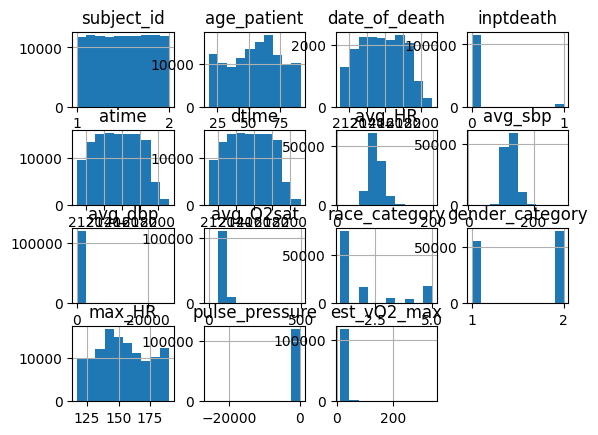

In [ ]:
df.hist()

In [ ]:
## will have to remove outliers for Est_vO2_Max for initial binary logistic regression...
##and then other columns for multiple variable

In [ ]:
## Create a new column to stratify patients by age. MIMIC -IV is an adultdataset .. patients are age 18 to 91 (anyone over age 91 is simply identified as being "91")

In [ ]:
## 2_22_24  Evaluate age groups later
##df.assign(Age_Group=pd.cut(df['AGE_patient'], bins=[17, 29, 39, 49, 59, 69,79,92], right=False, labels=[1, 2, 3,4,5,6,7]))
## df['Age_Group'] = pd.cut(x=df['AGE_patient'], bins=[17, 29, 39, 49, 59, 69,79,92], right=False, labels=[1, 2, 3,4,5,6,7])

In [ ]:
## First, will Need to convert the "date_of_death" datetime column to a new numeric column "outpatient_death"
# with only "0" for survival and "0" for oupatient deaths

In [ ]:
##found this in stackoverflow ....if it works create new column
df['date_of_death'].dt.strftime("%Y%m%d").astype(float)

0         22120122.0
1         22120114.0
2         22110916.0
3         22110227.0
4         22110117.0
             ...    
119352           NaN
119353           NaN
119354           NaN
119355           NaN
119356           NaN
Name: date_of_death, Length: 119357, dtype: float64

In [ ]:
df['outpatient_death'] = df['date_of_death'].dt.strftime("%Y%m%d").astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                119357 non-null  int64          
 1   age_patient               119357 non-null  int64          
 2   date_of_death             17676 non-null   datetime64[ns] 
 3   inptdeath                 119357 non-null  int64          
 4   atime                     119357 non-null  datetime64[ns] 
 5   dtime                     119357 non-null  datetime64[ns] 
 6   avg_HR                    119357 non-null  float64        
 7   avg_sbp                   119357 non-null  float64        
 8   avg_dbp                   119357 non-null  float64        
 9   avg_O2sat                 119357 non-null  float64        
 10  race_category             119357 non-null  int64          
 11  gender_category           119357 non-null  int64    

In [ ]:
df.tail(3)

,subject_id,age_patient,date_of_death,inptdeath,atime,dtime,avg_HR,avg_sbp,avg_dbp,avg_O2sat,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death,outpatient_death
119354,19531581,18,NaT,0,2196-08-17 18:40:00,2196-08-20 11:56:00,95.0,118.6,80.200000,99.600000,2,2,190,38.400000,30.600000,2 days 17:16:00,NaT,NaN
119355,17251355,18,NaT,0,2193-05-14 06:28:00,2193-05-16 11:15:00,70.0,109.0,74.666667,99.666667,1,2,190,34.333333,41.528571,2 days 04:47:00,NaT,NaN
119356,14332783,18,NaT,0,2201-05-15 20:10:00,2201-05-18 15:10:00,74.0,103.5,62.250000,100.000000,2,2,190,41.250000,39.283784,2 days 19:00:00,NaT,NaN


In [ ]:
df['outpatient_death']=pd.to_numeric(df['outpatient_death'])

In [ ]:
df.tail(3)

,subject_id,age_patient,date_of_death,inptdeath,atime,dtime,avg_HR,avg_sbp,avg_dbp,avg_O2sat,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death,outpatient_death
119354,19531581,18,NaT,0,2196-08-17 18:40:00,2196-08-20 11:56:00,95.0,118.6,80.200000,99.600000,2,2,190,38.400000,30.600000,2 days 17:16:00,NaT,NaN
119355,17251355,18,NaT,0,2193-05-14 06:28:00,2193-05-16 11:15:00,70.0,109.0,74.666667,99.666667,1,2,190,34.333333,41.528571,2 days 04:47:00,NaT,NaN
119356,14332783,18,NaT,0,2201-05-15 20:10:00,2201-05-18 15:10:00,74.0,103.5,62.250000,100.000000,2,2,190,41.250000,39.283784,2 days 19:00:00,NaT,NaN


In [ ]:
df['outpatient_death']=df['outpatient_death'].fillna(0)

In [ ]:
##Have set the Surviving patients to "0", now attempting to set the Deceased patients to "1" in Target Variable "outpatient_death"
df['outpatient_death'][df['outpatient_death']>0] = 1

<ipython-input-55-cf8c14d6a735>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_death'][df['outpatient_death']>0] = 1


In [ ]:
df['outpatient_death'].value_counts()

0.0    101681
1.0     17676
Name: outpatient_death, dtype: int64

In [ ]:
##The value counts for '1" and '0' are correct,(101681 + 17676 = 119,357) so this seems to have worked despite the warning ....**

In [ ]:
df.head(3)

,subject_id,age_patient,date_of_death,inptdeath,atime,dtime,avg_HR,avg_sbp,avg_dbp,avg_O2sat,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death,outpatient_death
0,18179783,86,2212-01-22,0,2208-04-30 16:47:00,2208-05-03 14:22:00,75.377358,135.452830,68.943396,98.340909,5,2,122,66.509434,24.763404,2 days 21:35:00,1358 days 09:38:00,1.0
1,11756261,62,2212-01-14,0,2201-10-12 08:45:00,2201-10-14 18:06:00,65.842105,139.055556,68.611111,98.842105,2,1,146,70.444444,33.926619,2 days 09:21:00,3743 days 05:54:00,1.0
2,16477638,61,2211-09-16,0,2210-10-09 14:33:00,2210-10-11 15:05:00,75.705882,147.745098,67.725490,98.234043,2,2,147,80.019608,29.708392,2 days 00:32:00,339 days 08:55:00,1.0


In [ ]:
df.tail(3)

,subject_id,age_patient,date_of_death,inptdeath,atime,dtime,avg_HR,avg_sbp,avg_dbp,avg_O2sat,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death,outpatient_death
119354,19531581,18,NaT,0,2196-08-17 18:40:00,2196-08-20 11:56:00,95.0,118.6,80.200000,99.600000,2,2,190,38.400000,30.600000,2 days 17:16:00,NaT,0.0
119355,17251355,18,NaT,0,2193-05-14 06:28:00,2193-05-16 11:15:00,70.0,109.0,74.666667,99.666667,1,2,190,34.333333,41.528571,2 days 04:47:00,NaT,0.0
119356,14332783,18,NaT,0,2201-05-15 20:10:00,2201-05-18 15:10:00,74.0,103.5,62.250000,100.000000,2,2,190,41.250000,39.283784,2 days 19:00:00,NaT,0.0


In [ ]:
## Create a new column to stratify patients by age. MIMIC -IV is an adultdataset (Ages 18 and up)..
## I am assuming that increased age would be correlated with higher risk of death... so would like to stratify by age.

In [ ]:
##df.assign(Age_Group=pd.cut(df['AGE_patient'], bins=[17, 29, 39, 49, 59, 69,79,92], right=False, labels=[1, 2, 3,4,5,6,7]))
##df['Age_Group'] = pd.cut(x=df['AGE_patient'], bins=[20, 29, 39, 49], labels=['20s', '30s', '40s'])

In [ ]:
df

,subject_id,age_patient,date_of_death,inptdeath,atime,dtime,avg_HR,avg_sbp,avg_dbp,avg_O2sat,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death,outpatient_death
0,18179783,86,2212-01-22,0,2208-04-30 16:47:00,2208-05-03 14:22:00,75.377358,135.452830,68.943396,98.340909,5,2,122,66.509434,24.763404,2 days 21:35:00,1358 days 09:38:00,1.0
1,11756261,62,2212-01-14,0,2201-10-12 08:45:00,2201-10-14 18:06:00,65.842105,139.055556,68.611111,98.842105,2,1,146,70.444444,33.926619,2 days 09:21:00,3743 days 05:54:00,1.0
2,16477638,61,2211-09-16,0,2210-10-09 14:33:00,2210-10-11 15:05:00,75.705882,147.745098,67.725490,98.234043,2,2,147,80.019608,29.708392,2 days 00:32:00,339 days 08:55:00,1.0
3,13774741,91,2211-02-27,0,2210-10-26 20:21:00,2210-10-30 12:30:00,86.903226,138.774194,74.677419,98.322581,5,2,117,64.096774,20.598775,3 days 16:09:00,119 days 11:30:00,1.0
4,12844772,58,2211-01-17,1,2211-01-14 13:14:00,2211-01-17 12:34:00,68.500000,142.833333,77.000000,96.666667,1,1,150,65.833333,33.503650,2 days 23:20:00,-1 days +11:26:00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,17027269,18,NaT,0,2189-10-04 17:28:00,2189-10-12 18:00:00,62.500000,131.500000,88.000000,98.000000,5,1,190,43.500000,46.512000,8 days 00:32:00,NaT,0.0
119353,17946600,18,NaT,0,2189-07-19 21:00:00,2189-07-26 14:30:00,92.000000,126.000000,75.000000,98.000000,5,2,190,51.000000,31.597826,6 days 17:30:00,NaT,0.0
119354,19531581,18,NaT,0,2196-08-17 18:40:00,2196-08-20 11:56:00,95.000000,118.600000,80.200000,99.600000,2,2,190,38.400000,30.600000,2 days 17:16:00,NaT,0.0
119355,17251355,18,NaT,0,2193-05-14 06:28:00,2193-05-16 11:15:00,70.000000,109.000000,74.666667,99.666667,1,2,190,34.333333,41.528571,2 days 04:47:00,NaT,0.0


In [ ]:
## Update 2_22_24: Cleaning all columns of interest for modeling
##Now get rid of outliers in the Est_Vo2 Max column since I want to focus on this variable first.
## NML Est_vO2_Max should range from from ~15/20 for very poorly conditioned
##older people to ~50-60 for very fit younger patients

<Axes: >

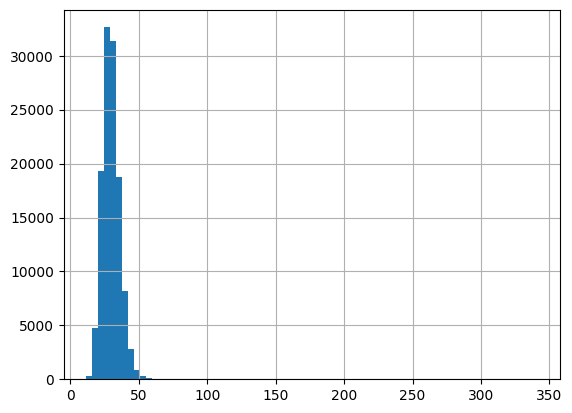

In [ ]:
df['est_vO2_max'].hist(bins=75)

In [ ]:
df['est_vO2_max'].describe()

count    119357.000000
mean         29.849081
std           6.400674
min          11.444400
25%          25.460395
50%          29.360341
75%          33.613636
max         340.971429
Name: est_vO2_max, dtype: float64

<Axes: >

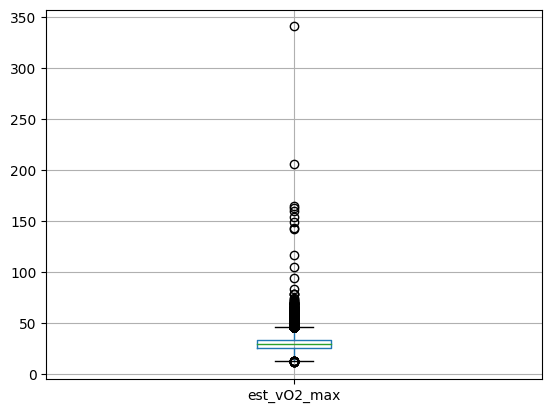

In [ ]:
## there appears to be some unrelatistically high outliers:
df.boxplot('est_vO2_max')

In [ ]:
p99=df['est_vO2_max'].quantile(0.99)
print(p99)

46.896096111465894


In [ ]:
count =(df['est_vO2_max'] > 60).sum()
print (count)

78


In [ ]:
p995=df['est_vO2_max'].quantile(0.995)
print(p995)

49.5854827586207


In [ ]:
p999=df['est_vO2_max'].quantile(0.999)
print(p999)

57.20264281312807


In [ ]:
count =(df['est_vO2_max'] > 50).sum()
print (count)

523


In [ ]:
p50=df['est_vO2_max'].quantile(0.50)
print(p50)

29.36034115013389


In [ ]:
##going to go back and just resest the values greater than 99.5 percentile to the mean
df.loc[df['est_vO2_max']>p995,'est_vO2_max']=p50

In [ ]:
##Was using this cap in my initial model, later decided to simply reset these outliers to the mean
##df.loc[df['Est_vO2_Max']>p995,'Est_vO2_Max']=p995


In [ ]:
df['est_vO2_max'].value_counts()

29.360341    599
30.600000    511
29.849081    511
38.250000    152
22.950000    119
            ... 
25.929474      1
23.308924      1
30.519580      1
30.101426      1
30.559790      1
Name: est_vO2_max, Length: 63989, dtype: int64

<Axes: >

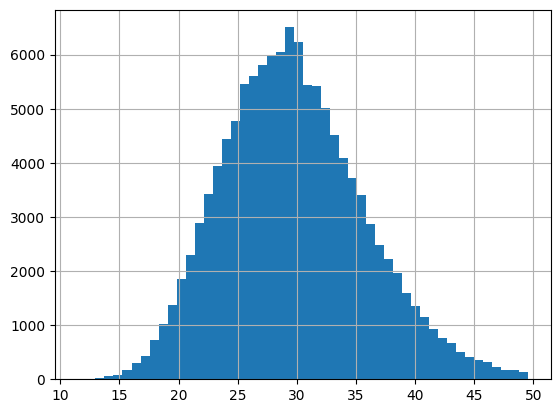

In [ ]:
df['est_vO2_max'].hist(bins=50)

In [ ]:
## Histogram looks much better.. but I may want to remove these outliers instead of cap them..concerned re: the peak at 49.585
## (I ended up removing the cap and just setting the values >995 percentile to the mean)
##Will need to get rid of outliers for other columns of interest (pulse_pressure, length_Of_stay... etc)

##Will first look at an initial logistic regression **bold text**

In [ ]:
df['est_vO2_max'].value_counts()

29.360341    599
30.600000    511
29.849081    511
38.250000    152
22.950000    119
            ... 
25.929474      1
23.308924      1
30.519580      1
30.101426      1
30.559790      1
Name: est_vO2_max, Length: 63989, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                119357 non-null  int64          
 1   age_patient               119357 non-null  int64          
 2   date_of_death             17676 non-null   datetime64[ns] 
 3   inptdeath                 119357 non-null  int64          
 4   atime                     119357 non-null  datetime64[ns] 
 5   dtime                     119357 non-null  datetime64[ns] 
 6   avg_HR                    119357 non-null  float64        
 7   avg_sbp                   119357 non-null  float64        
 8   avg_dbp                   119357 non-null  float64        
 9   avg_O2sat                 119357 non-null  float64        
 10  race_category             119357 non-null  int64          
 11  gender_category           119357 non-null  int64    

In [ ]:
df.describe()

,subject_id,age_patient,inptdeath,avg_HR,avg_sbp,avg_dbp,avg_O2sat,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death,outpatient_death
count,1.193570e+05,119357.000000,119357.000000,119357.000000,119357.000000,119357.000000,119357.000000,119357.000000,119357.000000,119357.000000,119357.000000,119357.000000,119357,17676,119357.000000
mean,1.501336e+07,54.879974,0.039646,80.746417,128.253461,74.471090,97.913155,1.943807,1.535855,153.120026,54.034398,29.713706,4 days 05:36:44.826193687,98 days 08:18:55.037338765,0.148094
std,2.888151e+06,20.220418,0.195126,14.162578,17.260534,93.328806,2.769638,1.479787,0.498715,20.220418,94.156269,5.981087,6 days 14:38:54.676416964,216 days 18:41:20.077168744,0.355194
min,1.000003e+07,18.000000,0.000000,7.000000,10.000000,6.000000,0.000000,1.000000,1.000000,117.000000,-25925.000000,11.444400,-1 days +01:21:00,-2172 days +06:30:00,0.000000
25%,1.250253e+07,38.000000,0.000000,71.000000,116.166667,65.823529,97.000000,1.000000,1.000000,137.000000,45.090909,25.460395,0 days 22:48:00,-1 days +23:29:30,0.000000
50%,1.502683e+07,56.000000,0.000000,79.571429,127.000000,72.750000,98.130435,1.000000,2.000000,152.000000,52.786517,29.360341,2 days 12:19:00,26 days 11:00:00,0.000000
75%,1.752118e+07,71.000000,0.000000,89.000000,138.600000,80.000000,99.000000,2.000000,2.000000,170.000000,63.117647,33.513770,4 days 20:52:00,132 days 06:41:00,0.000000
max,1.999999e+07,91.000000,1.000000,197.909091,293.000000,26028.500000,499.800000,5.000000,2.000000,190.000000,221.000000,49.583333,234 days 01:00:00,3901 days 20:30:00,1.000000


In [ ]:
# # repeat oulier process as above for other variables of interest and then begin modeling

## Let's Look pulse_pressure and avg_02_sat
## (O2 sat references https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0244171,
## https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4342789/

In [ ]:
df['pulse_pressure'].describe()

count    119357.000000
mean         54.034398
std          94.156269
min      -25925.000000
25%          45.090909
50%          52.786517
75%          63.117647
max         221.000000
Name: pulse_pressure, dtype: float64

<Axes: >

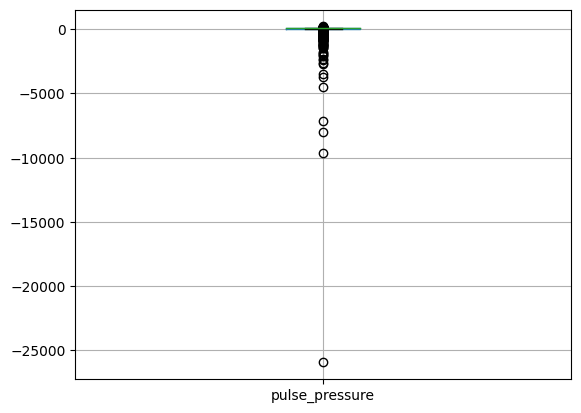

In [ ]:
df.boxplot('pulse_pressure')

In [ ]:
##pulse pressure can obviously not be negative by definition
pp99925=df['pulse_pressure'].quantile(0.99925)
print(pp99925)

120.6979285714267


In [ ]:
##pulse pressure can obviously not be negative by definition
pp0025=df['pulse_pressure'].quantile(0.0025)
print(pp0025)

-28.52238095238096


In [ ]:
pp50=df['pulse_pressure'].quantile(0.50)
print(pp50)

52.786516853932554


In [ ]:
df.loc[df['pulse_pressure']>pp99925,'pulse_pressure']=pp50

In [ ]:
pp004=df['pulse_pressure'].quantile(0.004)
print(pp004)

6.62826666666667


In [ ]:
count =(df['pulse_pressure'] < pp004).sum()
print (count)

478


In [ ]:
df.loc[df['pulse_pressure']<pp004,'pulse_pressure']=pp50

In [ ]:
df['pulse_pressure'].describe()

count    119357.000000
mean         55.469910
std          14.664496
min           6.666667
25%          45.250000
50%          52.786517
75%          63.011905
max         120.571429
Name: pulse_pressure, dtype: float64

<Axes: >

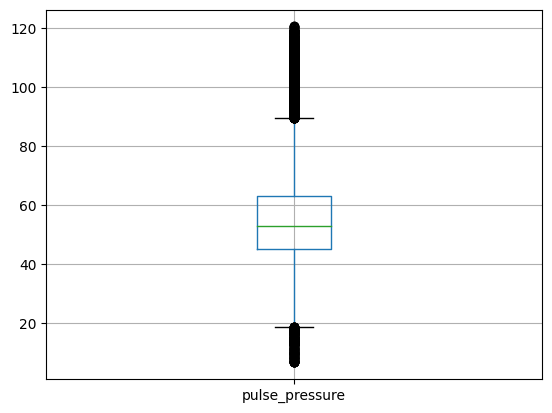

In [ ]:
df.boxplot('pulse_pressure')

<Axes: >

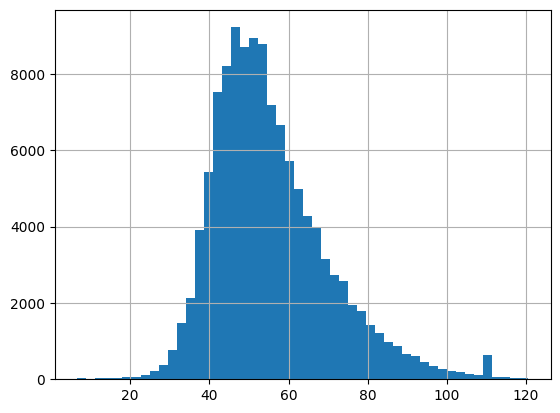

In [ ]:
df['pulse_pressure'].hist(bins=50)

In [ ]:
## seems a bit skewed, will set pp >> pp9925 = pp50
df.loc[df['pulse_pressure']>pp99925,'pulse_pressure']=pp50

In [ ]:
df['pulse_pressure'].describe()

count    119357.000000
mean         55.469910
std          14.664496
min           6.666667
25%          45.250000
50%          52.786517
75%          63.011905
max         120.571429
Name: pulse_pressure, dtype: float64

<Axes: >

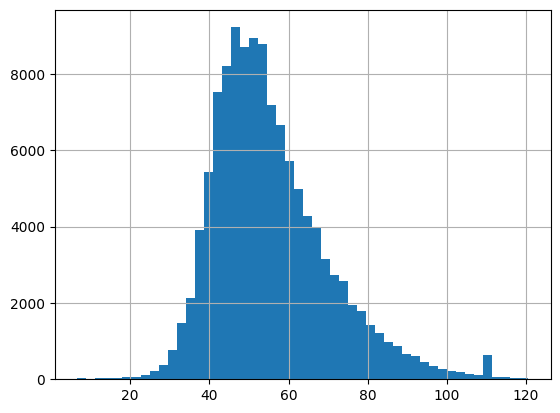

In [ ]:
df['pulse_pressure'].hist(bins=50)

In [ ]:
df['avg_O2sat'].describe()

count    119357.000000
mean         97.913155
std           2.769638
min           0.000000
25%          97.000000
50%          98.130435
75%          99.000000
max         499.800000
Name: avg_O2sat, dtype: float64

In [ ]:
##O2 Sat can not be greater than 100%
count =(df['avg_O2sat'] > 100).sum()
print (count)

24


In [ ]:
p02s999=df['avg_O2sat'].quantile(0.999)
print(p02s999)

100.0


In [ ]:
pO2s995=df['avg_O2sat'].quantile(0.995)
print(pO2s995)

100.0


In [ ]:
count =(df['avg_O2sat'] > 99.9).sum()
print (count)

9853


In [ ]:
count =(df['avg_O2sat'] < 80).sum()
print (count)

96


<Axes: >

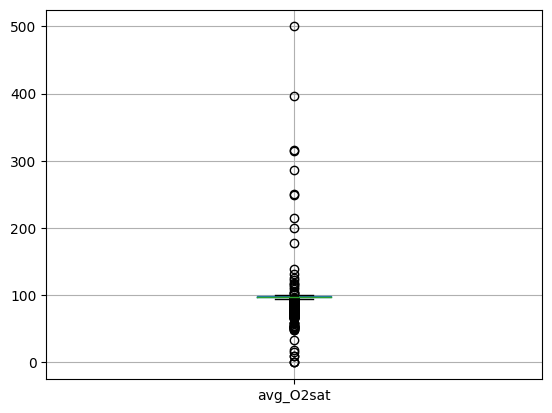

In [ ]:
df.boxplot('avg_O2sat')

In [ ]:
pO2s002=df['avg_O2sat'].quantile(0.002)
print(pO2s002)

87.60957142816


In [ ]:
df.loc[df['avg_O2sat']>p02s999,'avg_O2sat']=p02s999

In [ ]:
df.loc[df['avg_O2sat']<pO2s002,'avg_O2sat']=pO2s002

In [ ]:
df['avg_O2sat'].describe()

count    119357.000000
mean         97.917987
std           1.612216
min          87.609571
25%          97.000000
50%          98.130435
75%          99.000000
max         100.000000
Name: avg_O2sat, dtype: float64

In [ ]:
##For this notebook - I want to add AVG_BMI into the model before I Start Evaluating Logistic Regression Models,
## but there are > 31 thousand NA rows in "AVG_BMI" column.... I am going to simply drop these rows before modeling:

In [ ]:
## not using the AVG BMI data ... it was found not to be impactful in original D699 evaluating
## df2= df.dropna(subset=['AVG_BMI'])

In [ ]:
##df2['Survival'].value_counts()

In [ ]:
## so, still 88,346 rows in df2... including  13,183 deaths... will move forward with
##regression model on this smaller dataset
##df2.info()

In [ ]:
## BMI range from 16 severely underweight to 40+ severely obese
##(https://www.nhsinform.scot/healthy-living/food-and-nutrition/healthy-eating-and-weight-loss/body-mass-index-bmi/#
##df2['AVG_BMI'].describe()

In [ ]:
## still need to look at outliers in AVG_BMI column in df2... Max (107840) and Min (0) values are obviously incorrect
## NIH Tables for BMI stop at 55 (~ 6 foot tall person weighing 400 pounds) https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl2.htm
#df2.boxplot('AVG_BMI')

In [ ]:
##count =(df2['AVG_BMI'] > 55).sum()
##print (count)

In [ ]:
#count =(df2['AVG_BMI'] > 60).sum()
##print (count)

In [ ]:
##pbmi50=df2['AVG_BMI'].quantile(0.50)
##print(pbmi50)

In [ ]:
##pbmi996=df['AVG_BMI'].quantile(0.996)
#print(pbmi996)

In [ ]:
##df2.loc[df2['AVG_BMI']>pbmi996,'AVG_BMI']=pbmi50

In [ ]:
##df2['AVG_BMI'].describe()

In [ ]:
##count =(df2['AVG_BMI'] < 14).sum()
##print (count)

In [ ]:
##count =(df2['AVG_BMI'] < 15).sum()
##print (count)

In [ ]:
##pbmi003=df2['AVG_BMI'].quantile(0.003)
#print(pbmi003)

In [ ]:
##df2.loc[df2['AVG_BMI']<pbmi003,'AVG_BMI']=pbmi50

In [ ]:
##df2['AVG_BMI'].describe()

In [ ]:
##df2.info()

In [ ]:
##df2.describe().T

In [ ]:
## Need to remove the inpatient deaths from model as more interested in being able to predict risk of patients discharged from hospital/ED

In [ ]:
df['inptdeath'].value_counts()

0    114625
1      4732
Name: inptdeath, dtype: int64

In [ ]:
## want to delete the 4732 rows containing patients that died during their hospitilization or ED visit
print (df[df.inptdeath != 1])

        subject_id  age_patient date_of_death  inptdeath               atime  \
0         18179783           86    2212-01-22          0 2208-04-30 16:47:00   
1         11756261           62    2212-01-14          0 2201-10-12 08:45:00   
2         16477638           61    2211-09-16          0 2210-10-09 14:33:00   
3         13774741           91    2211-02-27          0 2210-10-26 20:21:00   
8         10497215           88    2210-04-19          0 2209-11-20 19:01:00   
...            ...          ...           ...        ...                 ...   
119352    17027269           18           NaT          0 2189-10-04 17:28:00   
119353    17946600           18           NaT          0 2189-07-19 21:00:00   
119354    19531581           18           NaT          0 2196-08-17 18:40:00   
119355    17251355           18           NaT          0 2193-05-14 06:28:00   
119356    14332783           18           NaT          0 2201-05-15 20:10:00   

                     dtime     avg_HR  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                119357 non-null  int64          
 1   age_patient               119357 non-null  int64          
 2   date_of_death             17676 non-null   datetime64[ns] 
 3   inptdeath                 119357 non-null  int64          
 4   atime                     119357 non-null  datetime64[ns] 
 5   dtime                     119357 non-null  datetime64[ns] 
 6   avg_HR                    119357 non-null  float64        
 7   avg_sbp                   119357 non-null  float64        
 8   avg_dbp                   119357 non-null  float64        
 9   avg_O2sat                 119357 non-null  float64        
 10  race_category             119357 non-null  int64          
 11  gender_category           119357 non-null  int64    

In [ ]:
df = df[df['inptdeath'] == 0]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,114625.0,15011968.392419,2887250.682333,10000032.0,12501269.0,15024791.0,17517276.0,19999987.0
age_patient,114625.0,54.26373,20.169381,18.0,37.0,56.0,70.0,91.0
inptdeath,114625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
avg_HR,114625.0,80.461254,13.959032,7.0,70.888889,79.333333,88.75,197.909091
avg_sbp,114625.0,128.450009,17.13792,10.0,116.5,127.0,138.719298,293.0
avg_dbp,114625.0,74.721377,95.125724,6.0,66.0,73.0,80.0,26028.5
avg_O2sat,114625.0,97.942973,1.587037,87.609571,97.0,98.166667,99.0,100.0
race_category,114625.0,1.936253,1.471839,1.0,1.0,1.0,2.0,5.0
gender_category,114625.0,1.538626,0.498508,1.0,1.0,2.0,2.0,2.0
max_HR,114625.0,153.73627,20.169381,117.0,138.0,152.0,171.0,190.0


In [ ]:
## inpatient deaths are now all 0 per above... will confirm with value_counts
df['inptdeath'].value_counts()

0    114625
Name: inptdeath, dtype: int64

In [ ]:
## This eliminated all of the patients that died during hospitilization... what are the target variable value counts now?
df['outpatient_death'].value_counts()

0.0    101681
1.0     12944
Name: outpatient_death, dtype: int64

In [ ]:
(df['outpatient_death'].value_counts()) / len(df) * 100

0.0    88.707525
1.0    11.292475
Name: outpatient_death, dtype: float64

In [ ]:
## Note : this remains a very imbalanced dataset Ratio of outpatient_death ("1")/alive ("0") = 101681/114625 = 7.4:1
## 88.7% of patients = "alive"/"0"... 11.3% = "outpatient death"/"1"

In [ ]:
## now will explore next variable of interest... "length_of_stay"
## first will convert to an integer type

In [ ]:
df['length_of_stay'] = df['length_of_stay'].dt.days.astype('int64')

<ipython-input-123-3fdfa9ad1001>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length_of_stay'] = df['length_of_stay'].dt.days.astype('int64')


<Axes: >

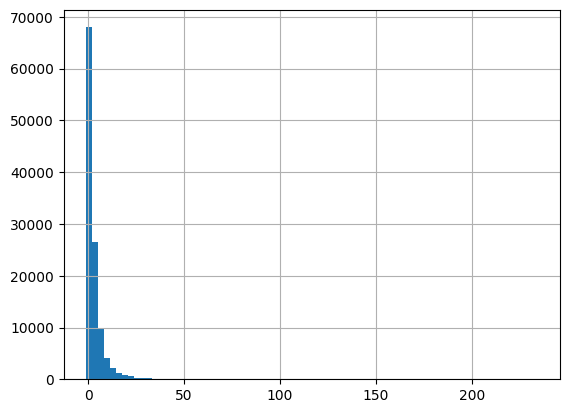

In [ ]:
df['length_of_stay'].hist(bins=75)

In [ ]:
df['length_of_stay'].describe()

count    114625.000000
mean          3.443969
std           5.980571
min          -1.000000
25%           0.000000
50%           2.000000
75%           4.000000
max         234.000000
Name: length_of_stay, dtype: float64

In [ ]:
##Makes no sense that length of stay is negative
count =(df['length_of_stay'] < 0).sum()
print (count)

14


In [ ]:
## a very minimal number (14) ... will just set these to p50
plos50=df['length_of_stay'].quantile(0.50)
print(plos50)

2.0


In [ ]:
##going to go back and just resest these negative values to 0.
df.loc[df['length_of_stay']<0,'length_of_stay']=plos50

<Axes: >

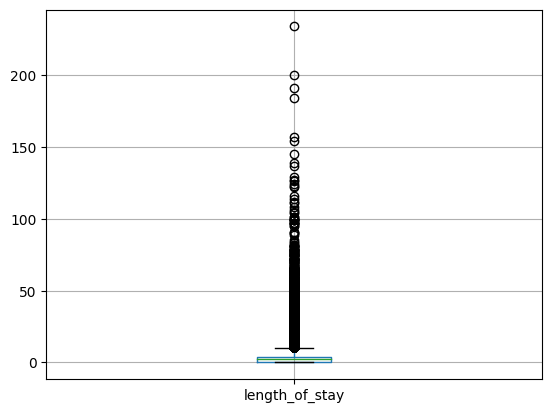

In [ ]:
df.boxplot('length_of_stay')

In [ ]:
plos999=df['length_of_stay'].quantile(0.999)
print(plos999)

64.0


In [ ]:
df['length_of_stay'].describe()

count    114625.000000
mean          3.444336
std           5.980390
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max         234.000000
Name: length_of_stay, dtype: float64

In [ ]:
count =(df['length_of_stay'] >64).sum()

print (count)

111


In [ ]:
##going to go back and just resest these negative values to the 99.9th percentile .
df.loc[df['length_of_stay']>plos999,'length_of_stay']=plos999

In [ ]:
df['length_of_stay'].describe()

count    114625.000000
mean          3.418600
std           5.575053
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          64.000000
Name: length_of_stay, dtype: float64

In [ ]:
plos995=df['length_of_stay'].quantile(0.995)
print(plos995)

37.0


In [ ]:
count =(df['length_of_stay'] >37).sum()

print (count)

558


In [ ]:
##going to go back and just resest these negative values to the 99.5th percentile .
df.loc[df['length_of_stay']>plos995,'length_of_stay']=plos995

In [ ]:
df['length_of_stay'].describe()

count    114625.000000
mean          3.351738
std           5.024530
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          37.000000
Name: length_of_stay, dtype: float64

In [ ]:
### now going to create a separate categorial dtype column binning length of stay durations
df['days_in_hospital_cat'] = pd.cut(x=df['length_of_stay'], bins=[0, 0.99, 1.99, 2.99, 3.99, 4.99, 13.99,38], right=False, labels=[1, 2, 3,4,5,6 ,7])

<ipython-input-139-fe43527e4f7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_in_hospital_cat'] = pd.cut(x=df['length_of_stay'], bins=[0, 0.99, 1.99, 2.99, 3.99, 4.99, 13.99,38], right=False, labels=[1, 2, 3,4,5,6 ,7])


In [ ]:
df['days_in_hospital_cat'].value_counts()

1    30946
6    21223
2    20647
3    16395
4    11896
5     8777
7     4741
Name: days_in_hospital_cat, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114625 entries, 0 to 119356
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                114625 non-null  int64          
 1   age_patient               114625 non-null  int64          
 2   date_of_death             12944 non-null   datetime64[ns] 
 3   inptdeath                 114625 non-null  int64          
 4   atime                     114625 non-null  datetime64[ns] 
 5   dtime                     114625 non-null  datetime64[ns] 
 6   avg_HR                    114625 non-null  float64        
 7   avg_sbp                   114625 non-null  float64        
 8   avg_dbp                   114625 non-null  float64        
 9   avg_O2sat                 114625 non-null  float64        
 10  race_category             114625 non-null  int64          
 11  gender_category           114625 non-null  int64    

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,114625.0,15011968.392419,2887250.682333,10000032.0,12501269.0,15024791.0,17517276.0,19999987.0
age_patient,114625.0,54.26373,20.169381,18.0,37.0,56.0,70.0,91.0
inptdeath,114625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
avg_HR,114625.0,80.461254,13.959032,7.0,70.888889,79.333333,88.75,197.909091
avg_sbp,114625.0,128.450009,17.13792,10.0,116.5,127.0,138.719298,293.0
avg_dbp,114625.0,74.721377,95.125724,6.0,66.0,73.0,80.0,26028.5
avg_O2sat,114625.0,97.942973,1.587037,87.609571,97.0,98.166667,99.0,100.0
race_category,114625.0,1.936253,1.471839,1.0,1.0,1.0,2.0,5.0
gender_category,114625.0,1.538626,0.498508,1.0,1.0,2.0,2.0,2.0
max_HR,114625.0,153.73627,20.169381,117.0,138.0,152.0,171.0,190.0


In [ ]:
## now convert race_category to a category dtype
from pandas.api.types import CategoricalDtype

In [ ]:
df['race_category_cat'] = pd.Categorical(df.race_category)

<ipython-input-144-a527ededf2e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race_category_cat'] = pd.Categorical(df.race_category)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114625 entries, 0 to 119356
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                114625 non-null  int64          
 1   age_patient               114625 non-null  int64          
 2   date_of_death             12944 non-null   datetime64[ns] 
 3   inptdeath                 114625 non-null  int64          
 4   atime                     114625 non-null  datetime64[ns] 
 5   dtime                     114625 non-null  datetime64[ns] 
 6   avg_HR                    114625 non-null  float64        
 7   avg_sbp                   114625 non-null  float64        
 8   avg_dbp                   114625 non-null  float64        
 9   avg_O2sat                 114625 non-null  float64        
 10  race_category             114625 non-null  int64          
 11  gender_category           114625 non-null  int64    

In [ ]:
##df['avg_O2sat'] = pd.to_numeric(df['avg_O2sat'])

In [ ]:
df['time_to_outpatient_death'].describe()

count                          12944
mean     134 days 11:46:55.267305316
std      243 days 11:44:31.364027444
min             -2172 days +06:30:00
25%                 18 days 06:00:00
50%                 67 days 05:52:00
75%                183 days 06:49:30
max               3901 days 20:30:00
Name: time_to_outpatient_death, dtype: object

In [ ]:
df['time_to_outpatient_death'].isnull()

0         False
1         False
2         False
3         False
8         False
          ...  
119352     True
119353     True
119354     True
119355     True
119356     True
Name: time_to_outpatient_death, Length: 114625, dtype: bool

In [ ]:
df['time_to_outpatient_death'].isnull() ==0


0          True
1          True
2          True
3          True
8          True
          ...  
119352    False
119353    False
119354    False
119355    False
119356    False
Name: time_to_outpatient_death, Length: 114625, dtype: bool

In [ ]:
##df['time_to_outpatient_death_no_nulls'] = df['time_to_outpatient_death'].fillna(0)
##df['column'].fillna(pd.Timedelta(seconds=0))
##df['time_to_outpatient_death_no_nulls'] = df['time_to_outpatient_death'].fillna((pd.Timedelta(days=0))
##df['time_to_outpatient_death_no_nulls'] = df['time_to_outpatient_death'].replace({'NaT': 0}, inplace=True)
##df['time_to_outpatient_death_no_nulls'] = pd.to_numeric(df['time_to_outpatient_death']).fillna(0)
## maybe need to convert this to an intermediate colum and then to numeric?
##df['outpatient_death_30'] = pd.to_numeric(df['outpatient_death_30days']).fillna(0)


In [ ]:
## NOT HELPFUL - DON'T UN COMMENT!
##df['time_to_outpatient_death_no_nulls'].value_counts()
## This resulted from ##df['time_to_outpatient_death_no_nulls'] = pd.to_numeric(df['time_to_outpatient_death']).fillna(0)

In [ ]:
## THIS IS IT!!... do this for both death_30 days and death_60 days
## First convert time to outpateitn death to new column in dt.days
#1 df['outpatient_death_30days'] = df['time_to_outpatient_death'].dt.days
##then convert that column to numeric  filling NaT values with 0
# 2 df['outpatient_death_30'] = pd.to_numeric(df['outpatient_death_30days']).fillna(0)
# 3 df['outpatient_death_30'].value_counts()

In [ ]:
##want to create two new columns that capture the number of patients that died within 30 days of hospital discharge... and 2) those that died within 60 days of hospital discharge>

In [ ]:
df['outpatient_death_30days'] = df['time_to_outpatient_death'].dt.days

<ipython-input-153-89b7edeebf26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_death_30days'] = df['time_to_outpatient_death'].dt.days


In [ ]:
df['outpatient_death_30'] = pd.to_numeric(df['outpatient_death_30days']).fillna(0)

<ipython-input-154-b1714d0ab601>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_death_30'] = pd.to_numeric(df['outpatient_death_30days']).fillna(0)


In [ ]:
df['outpatient_death_30'].value_counts()

0.0       101923
1.0          267
2.0          242
4.0          232
3.0          222
           ...  
2377.0         1
655.0          1
1129.0         1
3054.0         1
916.0          1
Name: outpatient_death_30, Length: 777, dtype: int64

In [ ]:
df['outpatient_death'].value_counts()

0.0    101681
1.0     12944
Name: outpatient_death, dtype: int64

In [ ]:
##2-24 attemtping to create this two new columsn as potential alternate independant variables
## patients that died outside of the 30 day window would be set to '0'
df['outpatient_death_30'][df['outpatient_death_30']>30] = 0

<ipython-input-157-87d0a473e9f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_death_30'][df['outpatient_death_30']>30] = 0
<ipython-input-157-87d0a473e9f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_death_30'][df['outpatient_death_30']>30] = 0


In [ ]:
df['outpatient_death_30'][df['outpatient_death_30']<0] = 0

<ipython-input-158-748cd0b20764>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_death_30'][df['outpatient_death_30']<0] = 0
<ipython-input-158-748cd0b20764>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_death_30'][df['outpatient_death_30']<0] = 0


In [ ]:
df['outpatient_death_30'].value_counts()

0.0     110573
1.0        267
2.0        242
4.0        232
3.0        222
7.0        190
5.0        175
6.0        172
9.0        161
8.0        155
11.0       142
10.0       141
13.0       139
14.0       137
12.0       136
16.0       121
17.0       117
22.0       116
21.0       110
19.0       106
18.0       102
26.0        99
23.0        97
15.0        94
24.0        94
20.0        94
29.0        89
25.0        81
28.0        79
30.0        76
27.0        66
Name: outpatient_death_30, dtype: int64

In [ ]:
## Now the only value in this column are "0" and positive integers between 1 and 30.
## These values can all now be set to "1" ("outpatient death within 30 days")

In [ ]:
df['outpatient_death_30'][df['outpatient_death_30']>0] = 1

<ipython-input-161-c5abba5fe10a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_death_30'][df['outpatient_death_30']>0] = 1
<ipython-input-161-c5abba5fe10a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_death_30'][df['outpatient_death_30']>0] = 1


In [ ]:
df['outpatient_death_30'].value_counts()

0.0    110573
1.0      4052
Name: outpatient_death_30, dtype: int64

In [ ]:
## Now have a second potential binary outcome column 'outpatient_death_30' ... will repeat to create "outpatient_death_60
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114625 entries, 0 to 119356
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                114625 non-null  int64          
 1   age_patient               114625 non-null  int64          
 2   date_of_death             12944 non-null   datetime64[ns] 
 3   inptdeath                 114625 non-null  int64          
 4   atime                     114625 non-null  datetime64[ns] 
 5   dtime                     114625 non-null  datetime64[ns] 
 6   avg_HR                    114625 non-null  float64        
 7   avg_sbp                   114625 non-null  float64        
 8   avg_dbp                   114625 non-null  float64        
 9   avg_O2sat                 114625 non-null  float64        
 10  race_category             114625 non-null  int64          
 11  gender_category           114625 non-null  int64    

In [ ]:
df['outpatient_death_60days'] = df['time_to_outpatient_death'].dt.days

<ipython-input-164-dce4f3eff5e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_death_60days'] = df['time_to_outpatient_death'].dt.days


In [ ]:
df['outpatient_death_60'] = pd.to_numeric(df['outpatient_death_60days']).fillna(0)

<ipython-input-165-d8e77d3fa6d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_death_60'] = pd.to_numeric(df['outpatient_death_60days']).fillna(0)


In [ ]:
df['outpatient_death_60'].value_counts()

0.0       101923
1.0          267
2.0          242
4.0          232
3.0          222
           ...  
2377.0         1
655.0          1
1129.0         1
3054.0         1
916.0          1
Name: outpatient_death_60, Length: 777, dtype: int64

In [ ]:
## patients that died outside of the 60 day window would be set to '0'
df['outpatient_death_60'][df['outpatient_death_60']>60] = 0

<ipython-input-167-6ffab9be06e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_death_60'][df['outpatient_death_60']>60] = 0
<ipython-input-167-6ffab9be06e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_death_60'][df['outpatient_death_60']>60] = 0


In [ ]:
df['outpatient_death_60'].value_counts()

 0.0       108664
 1.0          267
 2.0          242
 4.0          232
 3.0          222
            ...  
-525.0          1
-1887.0         1
-2172.0         1
-762.0          1
-1912.0         1
Name: outpatient_death_60, Length: 72, dtype: int64

In [ ]:
## also setting negative values to "0"
df['outpatient_death_60'][df['outpatient_death_60']<0] = 0

<ipython-input-169-ba5e88e87eb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_death_60'][df['outpatient_death_60']<0] = 0
<ipython-input-169-ba5e88e87eb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_death_60'][df['outpatient_death_60']<0] = 0


In [ ]:
## Now the only value in this column are "0" and positive integers between 1 and 60.
## These values can all now be set to "1" ("outpatient death within 60 days")
df['outpatient_death_60'][df['outpatient_death_60']>0] = 1

<ipython-input-170-c7889a341b0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_death_60'][df['outpatient_death_60']>0] = 1
<ipython-input-170-c7889a341b0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_death_60'][df['outpatient_death_60']>0] = 1


In [ ]:
df['outpatient_death_60'].value_counts()

0.0    108795
1.0      5830
Name: outpatient_death_60, dtype: int64

In [ ]:
## so 4052 patients died within 30 days of discharge and 5830 died within 60 days (compared to 12,944 that died within one year)
##How many patients died between 30 and 60 days? ... 1,778
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114625 entries, 0 to 119356
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                114625 non-null  int64          
 1   age_patient               114625 non-null  int64          
 2   date_of_death             12944 non-null   datetime64[ns] 
 3   inptdeath                 114625 non-null  int64          
 4   atime                     114625 non-null  datetime64[ns] 
 5   dtime                     114625 non-null  datetime64[ns] 
 6   avg_HR                    114625 non-null  float64        
 7   avg_sbp                   114625 non-null  float64        
 8   avg_dbp                   114625 non-null  float64        
 9   avg_O2sat                 114625 non-null  float64        
 10  race_category             114625 non-null  int64          
 11  gender_category           114625 non-null  int64    

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,114625.0,15011968.392419,2887250.682333,10000032.0,12501269.0,15024791.0,17517276.0,19999987.0
age_patient,114625.0,54.26373,20.169381,18.0,37.0,56.0,70.0,91.0
inptdeath,114625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
avg_HR,114625.0,80.461254,13.959032,7.0,70.888889,79.333333,88.75,197.909091
avg_sbp,114625.0,128.450009,17.13792,10.0,116.5,127.0,138.719298,293.0
avg_dbp,114625.0,74.721377,95.125724,6.0,66.0,73.0,80.0,26028.5
avg_O2sat,114625.0,97.942973,1.587037,87.609571,97.0,98.166667,99.0,100.0
race_category,114625.0,1.936253,1.471839,1.0,1.0,1.0,2.0,5.0
gender_category,114625.0,1.538626,0.498508,1.0,1.0,2.0,2.0,2.0
max_HR,114625.0,153.73627,20.169381,117.0,138.0,152.0,171.0,190.0


In [ ]:
df.isnull().sum()

subject_id                       0
age_patient                      0
date_of_death               101681
inptdeath                        0
atime                            0
dtime                            0
avg_HR                           0
avg_sbp                          0
avg_dbp                          0
avg_O2sat                        0
race_category                    0
gender_category                  0
max_HR                           0
pulse_pressure                   0
est_vO2_max                      0
length_of_stay                   0
time_to_outpatient_death    101681
outpatient_death                 0
days_in_hospital_cat             0
race_category_cat                0
outpatient_death_30days     101681
outpatient_death_30              0
outpatient_death_60days     101681
outpatient_death_60              0
dtype: int64

In [ ]:
## Now will run models comparing 30 day, 60 day and 1 year predictions on risk of outpatient death versus survival

In [ ]:
pip install PYCARET

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.2 MB/

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114625 entries, 0 to 119356
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                114625 non-null  int64          
 1   age_patient               114625 non-null  int64          
 2   date_of_death             12944 non-null   datetime64[ns] 
 3   inptdeath                 114625 non-null  int64          
 4   atime                     114625 non-null  datetime64[ns] 
 5   dtime                     114625 non-null  datetime64[ns] 
 6   avg_HR                    114625 non-null  float64        
 7   avg_sbp                   114625 non-null  float64        
 8   avg_dbp                   114625 non-null  float64        
 9   avg_O2sat                 114625 non-null  float64        
 10  race_category             114625 non-null  int64          
 11  gender_category           114625 non-null  int64    

In [ ]:
## Will use undersampling technique first... first starting with stratification... stratify datasets by number of "1" outpaitent death events
## 12944 for original dataset, then 4052 for 30 day death set... and 5830 for 60 day...
## This will create three datasets with 1) Outpatient death w/i one year, 2) Outpatient death w/i 30 days and 3) Outpatient death w/i 60 days as the independant variables for each

In [ ]:
df_strat=df.groupby('outpatient_death', group_keys=False).apply(lambda x: x.sample(12944))
##df.groupby('outpatient_death', group_keys=False).apply(lambda x: x.sample(12944))

In [ ]:
df_strat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25888 entries, 83856 to 8239
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                25888 non-null  int64          
 1   age_patient               25888 non-null  int64          
 2   date_of_death             12944 non-null  datetime64[ns] 
 3   inptdeath                 25888 non-null  int64          
 4   atime                     25888 non-null  datetime64[ns] 
 5   dtime                     25888 non-null  datetime64[ns] 
 6   avg_HR                    25888 non-null  float64        
 7   avg_sbp                   25888 non-null  float64        
 8   avg_dbp                   25888 non-null  float64        
 9   avg_O2sat                 25888 non-null  float64        
 10  race_category             25888 non-null  int64          
 11  gender_category           25888 non-null  int64          
 12  m

In [ ]:
df_strat_30=df.groupby('outpatient_death_30', group_keys=False).apply(lambda x: x.sample(4052))


In [ ]:
df_strat_60=df.groupby('outpatient_death_60', group_keys=False).apply(lambda x: x.sample(5830))

In [ ]:
df_strat_30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8104 entries, 37082 to 15896
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                8104 non-null   int64          
 1   age_patient               8104 non-null   int64          
 2   date_of_death             4387 non-null   datetime64[ns] 
 3   inptdeath                 8104 non-null   int64          
 4   atime                     8104 non-null   datetime64[ns] 
 5   dtime                     8104 non-null   datetime64[ns] 
 6   avg_HR                    8104 non-null   float64        
 7   avg_sbp                   8104 non-null   float64        
 8   avg_dbp                   8104 non-null   float64        
 9   avg_O2sat                 8104 non-null   float64        
 10  race_category             8104 non-null   int64          
 11  gender_category           8104 non-null   int64          
 12  m

In [ ]:
df_strat_60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11660 entries, 39121 to 10538
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                11660 non-null  int64          
 1   age_patient               11660 non-null  int64          
 2   date_of_death             6221 non-null   datetime64[ns] 
 3   inptdeath                 11660 non-null  int64          
 4   atime                     11660 non-null  datetime64[ns] 
 5   dtime                     11660 non-null  datetime64[ns] 
 6   avg_HR                    11660 non-null  float64        
 7   avg_sbp                   11660 non-null  float64        
 8   avg_dbp                   11660 non-null  float64        
 9   avg_O2sat                 11660 non-null  float64        
 10  race_category             11660 non-null  int64          
 11  gender_category           11660 non-null  int64          
 12  

In [ ]:
## 2-24 let's look at african american (race category 2 only)
## Then will repeat for caucasion/whit (race category 1 only)... and hispanic/latino (race category 3 only)

In [ ]:
df['race_category'].value_counts()

1    72088
5    17342
2    16368
3     4899
4     3928
Name: race_category, dtype: int64

In [ ]:
df_racecat_2 = df[df['race_category'] == 2]

In [ ]:
df_racecat_1 = df[df['race_category'] == 1]

In [ ]:
df_racecat_3 = df[df['race_category'] == 3]

In [ ]:
df_racecat_2 .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16368 entries, 1 to 119356
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                16368 non-null  int64          
 1   age_patient               16368 non-null  int64          
 2   date_of_death             1291 non-null   datetime64[ns] 
 3   inptdeath                 16368 non-null  int64          
 4   atime                     16368 non-null  datetime64[ns] 
 5   dtime                     16368 non-null  datetime64[ns] 
 6   avg_HR                    16368 non-null  float64        
 7   avg_sbp                   16368 non-null  float64        
 8   avg_dbp                   16368 non-null  float64        
 9   avg_O2sat                 16368 non-null  float64        
 10  race_category             16368 non-null  int64          
 11  gender_category           16368 non-null  int64          
 12  max

In [ ]:
df_racecat_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72088 entries, 9 to 119355
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                72088 non-null  int64          
 1   age_patient               72088 non-null  int64          
 2   date_of_death             9400 non-null   datetime64[ns] 
 3   inptdeath                 72088 non-null  int64          
 4   atime                     72088 non-null  datetime64[ns] 
 5   dtime                     72088 non-null  datetime64[ns] 
 6   avg_HR                    72088 non-null  float64        
 7   avg_sbp                   72088 non-null  float64        
 8   avg_dbp                   72088 non-null  float64        
 9   avg_O2sat                 72088 non-null  float64        
 10  race_category             72088 non-null  int64          
 11  gender_category           72088 non-null  int64          
 12  max

In [ ]:
df_racecat_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4899 entries, 51 to 119229
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                4899 non-null   int64          
 1   age_patient               4899 non-null   int64          
 2   date_of_death             230 non-null    datetime64[ns] 
 3   inptdeath                 4899 non-null   int64          
 4   atime                     4899 non-null   datetime64[ns] 
 5   dtime                     4899 non-null   datetime64[ns] 
 6   avg_HR                    4899 non-null   float64        
 7   avg_sbp                   4899 non-null   float64        
 8   avg_dbp                   4899 non-null   float64        
 9   avg_O2sat                 4899 non-null   float64        
 10  race_category             4899 non-null   int64          
 11  gender_category           4899 non-null   int64          
 12  max

In [ ]:
##All look correct based on value counts above... df_racecat_3 is smaller though and only contains 230 deaths

In [ ]:
df_racecat_2['outpatient_death'].value_counts()

0.0    15077
1.0     1291
Name: outpatient_death, dtype: int64

In [ ]:
df_racecat_2['outpatient_death_60'].value_counts()

0.0    15785
1.0      583
Name: outpatient_death_60, dtype: int64

In [ ]:
df_racecat_2['outpatient_death_30'].value_counts()

0.0    15951
1.0      417
Name: outpatient_death_30, dtype: int64

In [ ]:
## Will stratify this df_racecat_2 by # of outpatient deaths
df_racecat_2_strat=df_racecat_2.groupby('outpatient_death', group_keys=False).apply(lambda x: x.sample(1291))
df_racecat_2_strat_60=df_racecat_2.groupby('outpatient_death_60', group_keys=False).apply(lambda x: x.sample(583))
df_racecat_2_strat_30=df_racecat_2.groupby('outpatient_death_30', group_keys=False).apply(lambda x: x.sample(417))

In [ ]:
## Repeat above for df_racecat_1
df_racecat_1['outpatient_death'].value_counts()

0.0    62688
1.0     9400
Name: outpatient_death, dtype: int64

In [ ]:
df_racecat_1['outpatient_death_60'].value_counts()

0.0    67896
1.0     4192
Name: outpatient_death_60, dtype: int64

In [ ]:
df_racecat_1['outpatient_death_30'].value_counts()

0.0    69197
1.0     2891
Name: outpatient_death_30, dtype: int64

In [ ]:
# Will stratify this df_racecat_1 by # of outpatient deaths
df_racecat_1_strat=df_racecat_1.groupby('outpatient_death', group_keys=False).apply(lambda x: x.sample(9400))
df_racecat_1_strat_60=df_racecat_1.groupby('outpatient_death_60', group_keys=False).apply(lambda x: x.sample(4192))
df_racecat_1_strat_30=df_racecat_1.groupby('outpatient_death_30', group_keys=False).apply(lambda x: x.sample(2891))

In [ ]:
## and now repeat for df_racecat_3
df_racecat_3['outpatient_death'].value_counts()

0.0    4669
1.0     230
Name: outpatient_death, dtype: int64

In [ ]:

df_racecat_3['outpatient_death_60'].value_counts()

0.0    4790
1.0     109
Name: outpatient_death_60, dtype: int64

In [ ]:

df_racecat_3['outpatient_death_30'].value_counts()

0.0    4825
1.0      74
Name: outpatient_death_30, dtype: int64

In [ ]:
## Now will repeat the avove stratification for df_race_cat_3

In [ ]:
# Will stratify this df_racecat_3 by # of outpatient deaths
df_racecat_3_strat=df_racecat_3.groupby('outpatient_death', group_keys=False).apply(lambda x: x.sample(230))
df_racecat_3_strat_60=df_racecat_3.groupby('outpatient_death_60', group_keys=False).apply(lambda x: x.sample(109))
df_racecat_3_strat_30=df_racecat_3.groupby('outpatient_death_30', group_keys=False).apply(lambda x: x.sample(74))

In [ ]:
## will start by comparing 60 day outpatient death models for all three race dataframes stratified by outpatient death numbers

In [ ]:
data_racecat_2_strat_60 =df_racecat_2_strat_60[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat', 'outpatient_death_60']]

In [ ]:
data_racecat_3_strat_60 =df_racecat_3_strat_60[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat', 'outpatient_death_60']]

In [ ]:
data_racecat_1_strat_60 =df_racecat_1_strat_60[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat', 'outpatient_death_60']]

In [ ]:
df_strat_60 =df_strat_60[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat', 'outpatient_death_60']]

In [ ]:
## Results of above are best so far: Random Forest Classifier	0.7931	0.8588	0.8066	0.7916	0.7951	0.5862	0.5917	0.2500 78%/80%

In [ ]:
## data_racecat_2 =df_racecat_2_strat[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat', 'outpatient_death']]

In [ ]:
## Not as good as outpatient_death_60 model

In [ ]:
## Now create these stratified dataframes for modeling

In [ ]:
##data =df_strat[['est_vO2_max','length_of_stay','gender_category','outpatient_death']]
## AdaBoost Acc = .7135 71%/74%
##data =df_strat[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','race_category', 'outpatient_death']]
## 	Gradient Boosting Classifier Acc = 7284 69%/74%
##data =df_strat[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat', 'outpatient_death']]
## 	Gradient Boosting Classifier Acc = 7255 69%/78%



In [ ]:
## look at our most predictive model above substituting 30 and 60 day outcome data
##data_60 =df_strat_60[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat', 'outpatient_death_60']]

In [ ]:
## Results with data_60 above: Gradient Boosting Classifier	0.7385	0.8136	0.7824	0.7197	0.7495	0.4770	0.4793	0.9270 (72%/77%)

In [ ]:
#data_60 =df_strat_60[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat', 'race_category', 'outpatient_death_60']]
##Results of above: gbc	Gradient Boosting Classifier	0.7462	0.8194	0.7998	0.7229	0.7592	0.4925	0.4956	0.9670

In [ ]:
#data_30 =df_strat_30[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat', 'outpatient_death_30']]

In [ ]:
## data_60.info()

In [ ]:
##Now will evaluate these three stratified dfs

In [ ]:
from pycaret.classification import *
s = setup(data =data_racecat_2_strat_60, target = 'outpatient_death_60')

,Description,Value
0,Session id,8704
1,Target,outpatient_death_60
2,Target type,Binary
3,Original data shape,"(1166, 6)"
4,Transformed data shape,"(1166, 6)"
5,Transformed train set shape,"(816, 6)"
6,Transformed test set shape,"(350, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7634,0.8258,0.7743,0.7602,0.7650,0.5267,0.5299,0.1350
gbc,Gradient Boosting Classifier,0.7623,0.8302,0.7793,0.7557,0.7659,0.5245,0.5269,0.1860
lr,Logistic Regression,0.7573,0.8378,0.7696,0.7525,0.7597,0.5146,0.5165,0.0420
et,Extra Trees Classifier,0.7560,0.8278,0.7743,0.7495,0.7593,0.5120,0.5157,0.1970
rf,Random Forest Classifier,0.7548,0.8214,0.7840,0.7428,0.7615,0.5096,0.5122,0.3220
ridge,Ridge Classifier,0.7524,0.0000,0.7795,0.7419,0.7588,0.5049,0.5077,0.0280
lda,Linear Discriminant Analysis,0.7524,0.8354,0.7795,0.7419,0.7588,0.5049,0.5077,0.0330
xgboost,Extreme Gradient Boosting,0.7389,0.8171,0.7374,0.7412,0.7364,0.4777,0.4812,0.0810
nb,Naive Bayes,0.7278,0.8081,0.6962,0.7466,0.7187,0.4558,0.4587,0.0320
knn,K Neighbors Classifier,0.7267,0.7965,0.7376,0.7260,0.7295,0.4535,0.4563,0.0510


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

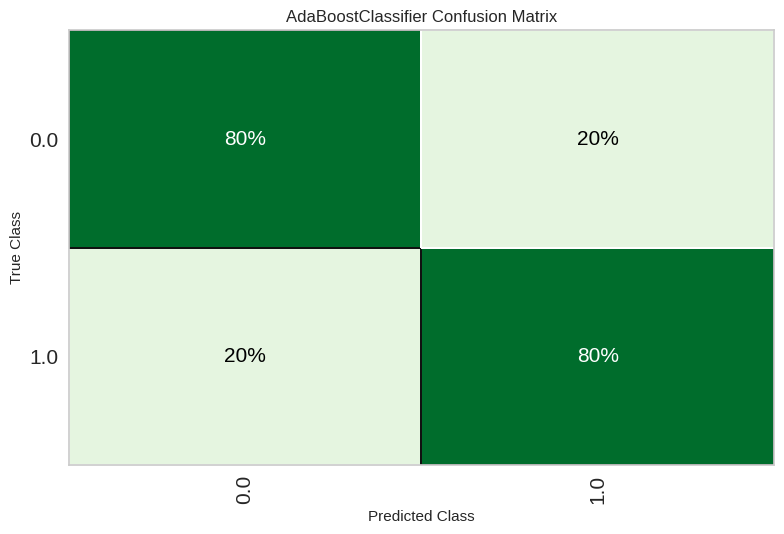

In [ ]:
# plot confusion matrix
## plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
plot_model(best, plot = 'confusion_matrix',plot_kwargs = {'percent' : True})

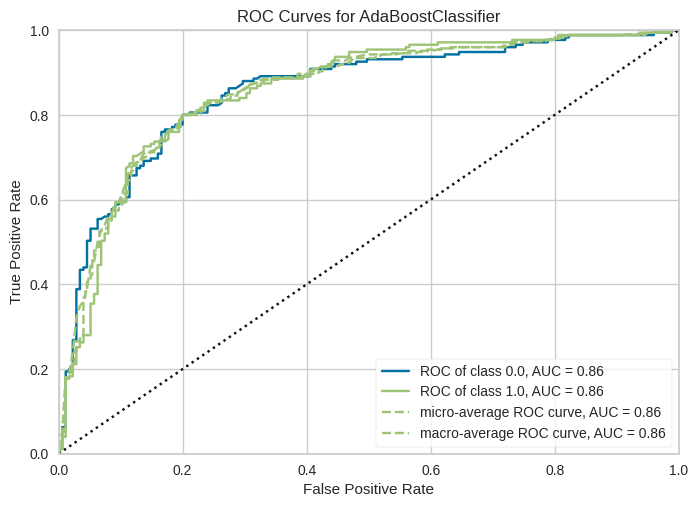

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

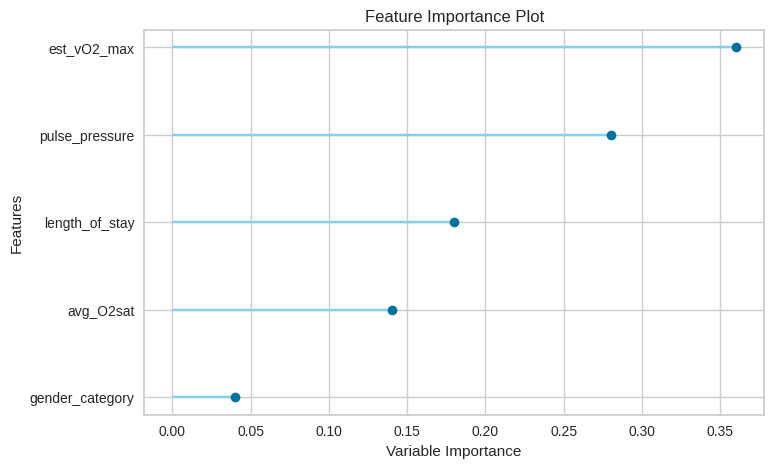

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

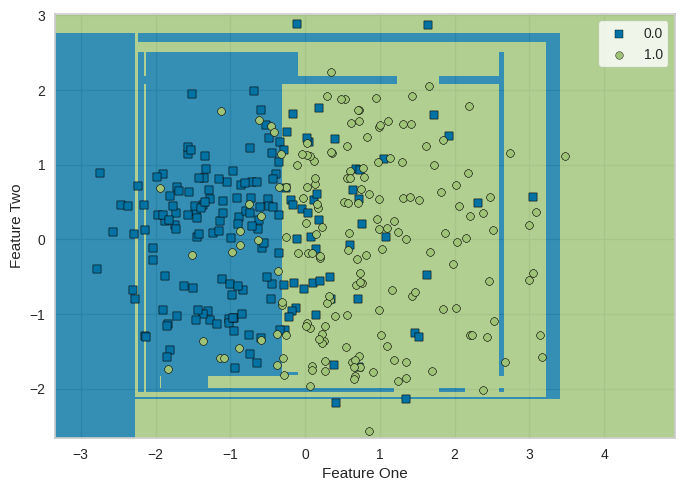

In [ ]:
# make a boundary plot
plot_model(best, 'boundary')

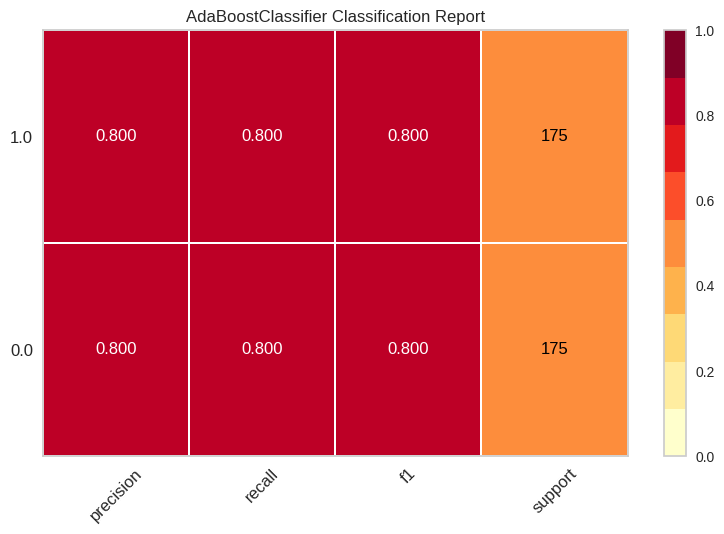

In [ ]:
plot_model(best, plot='class_report', verbose=False)

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8000,0.8572,0.8000,0.8000,0.8000,0.6000,0.6000


In [ ]:
## For future reference
#df2_1 = df2[df2['Age_Group'] == 1]
#df2_2 = df2[df2['Age_Group'] == 2]
#df2_5 = df2[df2['Age_Group'] == 5]
#df2_6 = df2[df2['Age_Group'] == 6]


In [ ]:
## Repeat for race -cat 1 and race cat 3

In [ ]:
from pycaret.classification import *
s = setup(data =data_racecat_1_strat_60, target = 'outpatient_death_60')

,Description,Value
0,Session id,8496
1,Target,outpatient_death_60
2,Target type,Binary
3,Original data shape,"(8384, 6)"
4,Transformed data shape,"(8384, 6)"
5,Transformed train set shape,"(5868, 6)"
6,Transformed test set shape,"(2516, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7301,0.7954,0.7751,0.7113,0.7417,0.4601,0.4622,0.5890
ada,Ada Boost Classifier,0.7258,0.7940,0.7403,0.7197,0.7297,0.4516,0.4520,0.3610
lr,Logistic Regression,0.7227,0.7944,0.7243,0.7222,0.7230,0.4455,0.4457,0.5910
ridge,Ridge Classifier,0.7226,0.0000,0.7314,0.7188,0.7249,0.4451,0.4454,0.0300
lda,Linear Discriminant Analysis,0.7226,0.7894,0.7314,0.7188,0.7249,0.4451,0.4454,0.0340
lightgbm,Light Gradient Boosting Machine,0.7181,0.7852,0.7652,0.7000,0.7309,0.4363,0.4385,0.4120
rf,Random Forest Classifier,0.7174,0.7785,0.7553,0.7027,0.7277,0.4349,0.4366,0.8100
qda,Quadratic Discriminant Analysis,0.7123,0.7802,0.6844,0.7251,0.7040,0.4247,0.4255,0.0340
et,Extra Trees Classifier,0.7115,0.7703,0.7451,0.6989,0.7210,0.4230,0.4242,0.6850
nb,Naive Bayes,0.7069,0.7791,0.6568,0.7297,0.6912,0.4138,0.4159,0.0460


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

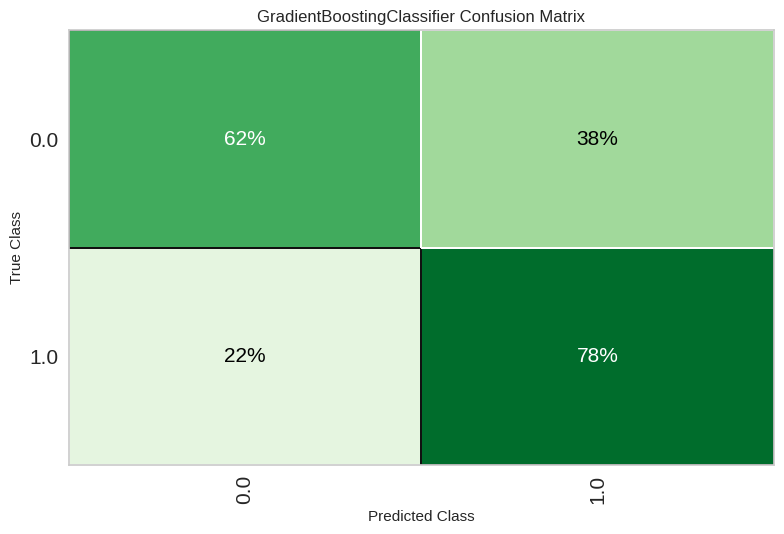

In [ ]:
# plot confusion matrix
## plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
plot_model(best, plot = 'confusion_matrix',plot_kwargs = {'percent' : True})

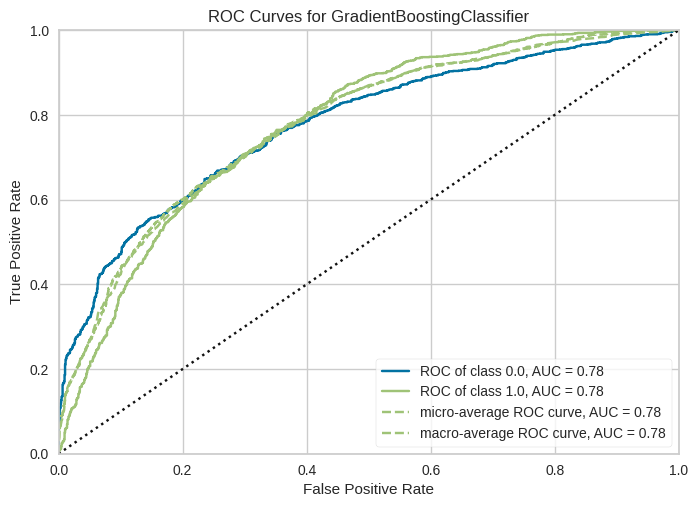

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

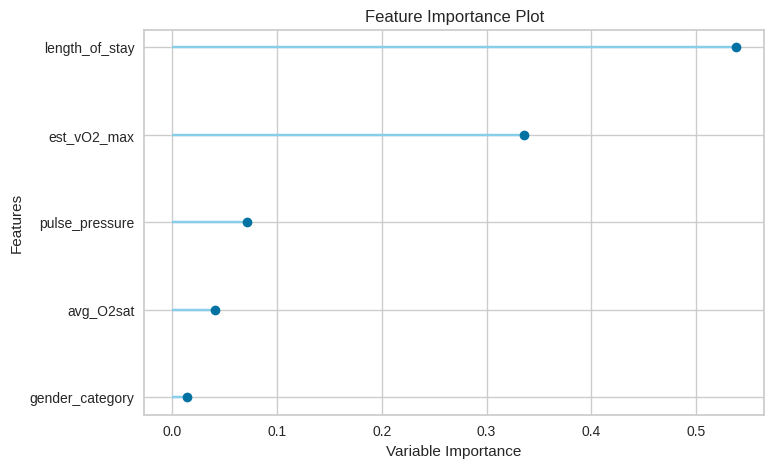

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

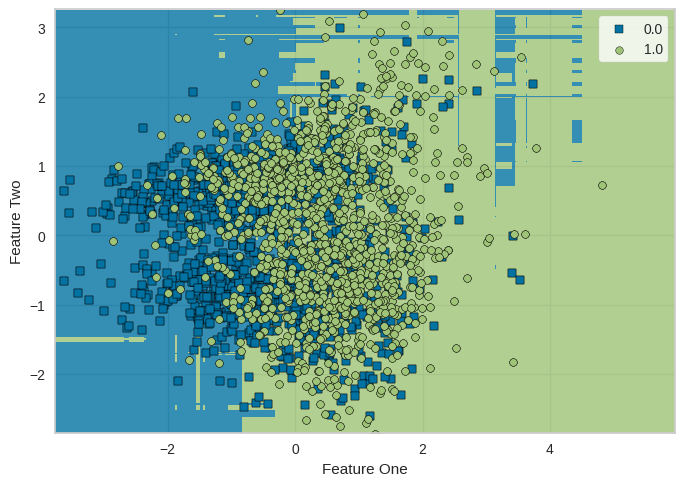

In [ ]:
# make a boundary plot
plot_model(best, 'boundary')

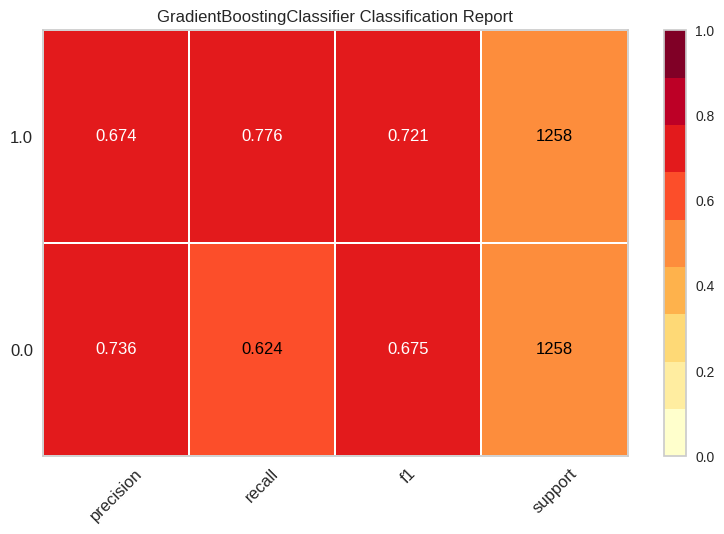

In [ ]:
plot_model(best, plot='class_report', verbose=False)

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6999,0.7766,0.7758,0.6736,0.7211,0.3998,0.4045


In [ ]:
## Finally repeat process for race category # 3

In [ ]:
from pycaret.classification import *
s = setup(data =data_racecat_3_strat_60, target = 'outpatient_death_60')

,Description,Value
0,Session id,4887
1,Target,outpatient_death_60
2,Target type,Binary
3,Original data shape,"(218, 6)"
4,Transformed data shape,"(218, 6)"
5,Transformed train set shape,"(152, 6)"
6,Transformed test set shape,"(66, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8092,0.8500,0.7786,0.8584,0.7943,0.6205,0.6453,0.2000
lightgbm,Light Gradient Boosting Machine,0.7767,0.8348,0.7375,0.8206,0.7633,0.5538,0.5699,0.5060
et,Extra Trees Classifier,0.7696,0.8182,0.7232,0.8346,0.7515,0.5380,0.5655,0.1580
xgboost,Extreme Gradient Boosting,0.7692,0.8299,0.7375,0.7937,0.7586,0.5391,0.5471,0.0540
gbc,Gradient Boosting Classifier,0.7629,0.8326,0.7482,0.7853,0.7528,0.5246,0.5398,0.1300
lr,Logistic Regression,0.7371,0.8116,0.7500,0.7489,0.7349,0.4740,0.4919,0.0460
ada,Ada Boost Classifier,0.7304,0.7743,0.7232,0.7575,0.7184,0.4609,0.4815,0.1170
dt,Decision Tree Classifier,0.7029,0.7045,0.7125,0.7310,0.6992,0.4076,0.4320,0.0480
knn,K Neighbors Classifier,0.6979,0.7704,0.6679,0.6868,0.6536,0.3913,0.4025,0.0480
ridge,Ridge Classifier,0.6971,0.0000,0.6679,0.7187,0.6702,0.3916,0.4129,0.0410


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

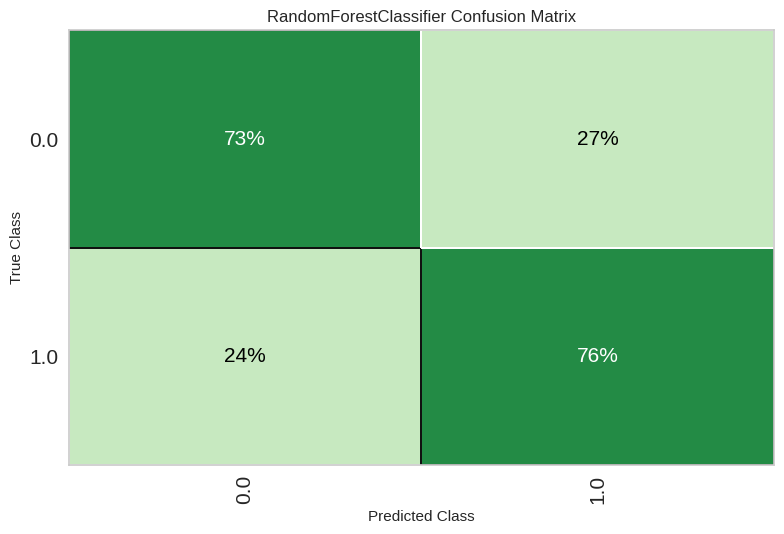

In [ ]:
# plot confusion matrix
## plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
plot_model(best, plot = 'confusion_matrix',plot_kwargs = {'percent' : True})

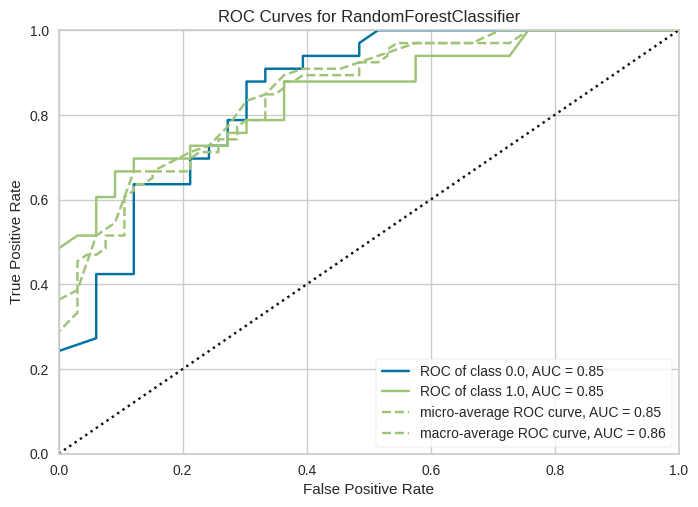

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

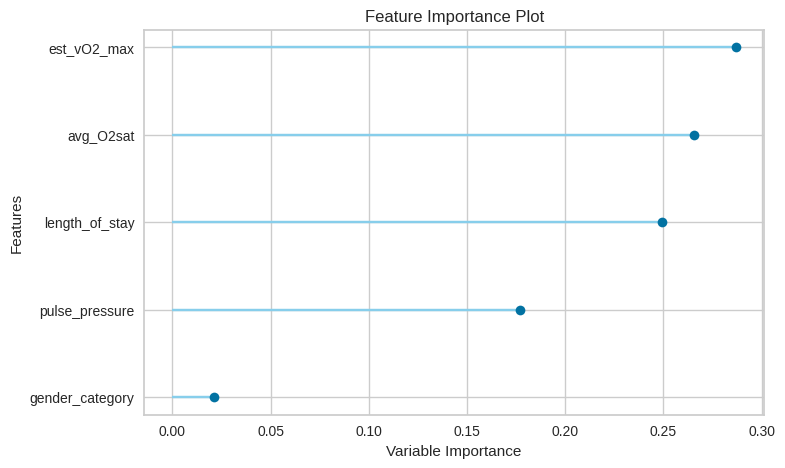

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

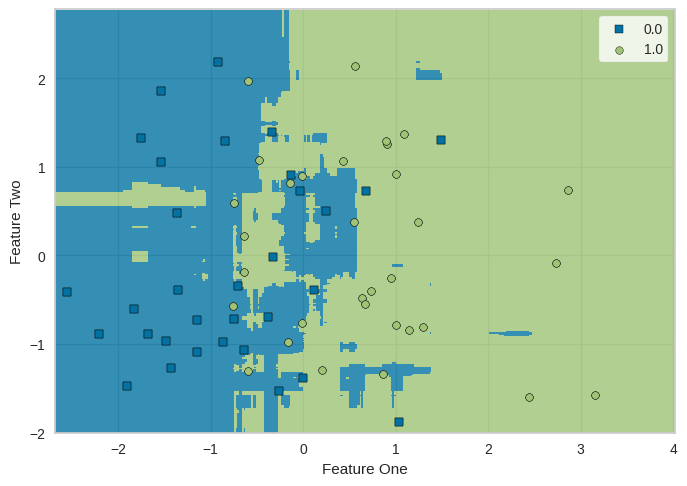

In [ ]:
# make a boundary plot
plot_model(best, 'boundary')

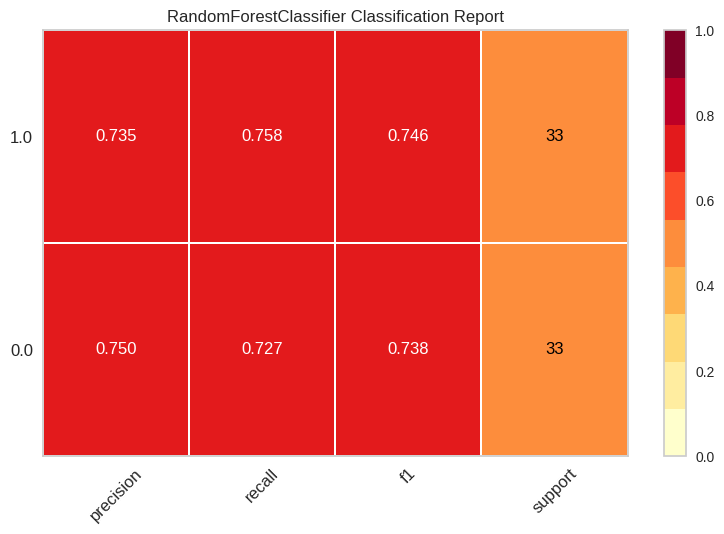

In [ ]:
plot_model(best, plot='class_report', verbose=False)

In [ ]:
## finally let's look at the overall predictability for the stratified 60 day outpatient death set:

In [ ]:
from pycaret.classification import *
s = setup(data =df_strat_60, target = 'outpatient_death_60')

,Description,Value
0,Session id,2118
1,Target,outpatient_death_60
2,Target type,Binary
3,Original data shape,"(11660, 6)"
4,Transformed data shape,"(11660, 6)"
5,Transformed train set shape,"(8161, 6)"
6,Transformed test set shape,"(3499, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7361,0.8130,0.7757,0.7187,0.7460,0.4721,0.4739,0.7790
ada,Ada Boost Classifier,0.7342,0.8078,0.7444,0.7294,0.7367,0.4685,0.4687,0.4190
lightgbm,Light Gradient Boosting Machine,0.7308,0.8065,0.7745,0.7122,0.7420,0.4616,0.4636,0.6690
lr,Logistic Regression,0.7296,0.8037,0.7385,0.7256,0.7318,0.4591,0.4594,0.5250
lda,Linear Discriminant Analysis,0.7266,0.7995,0.7431,0.7194,0.7310,0.4533,0.4537,0.0550
ridge,Ridge Classifier,0.7265,0.0000,0.7431,0.7193,0.7309,0.4530,0.4534,0.0420
rf,Random Forest Classifier,0.7249,0.7965,0.7520,0.7134,0.7320,0.4498,0.4507,1.1810
et,Extra Trees Classifier,0.7239,0.7895,0.7547,0.7110,0.7320,0.4479,0.4490,0.7990
xgboost,Extreme Gradient Boosting,0.7203,0.7920,0.7488,0.7083,0.7279,0.4405,0.4413,0.1580
qda,Quadratic Discriminant Analysis,0.7123,0.7885,0.6897,0.7225,0.7056,0.4246,0.4252,0.0380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

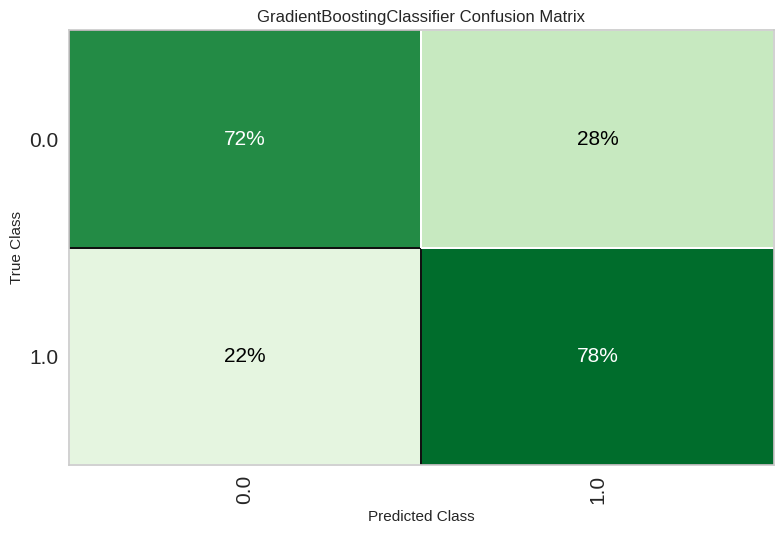

In [ ]:
# plot confusion matrix
## plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
plot_model(best, plot = 'confusion_matrix',plot_kwargs = {'percent' : True})

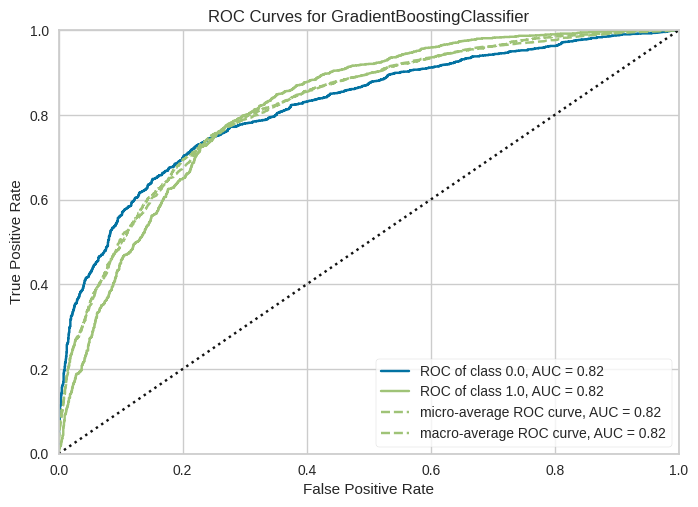

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

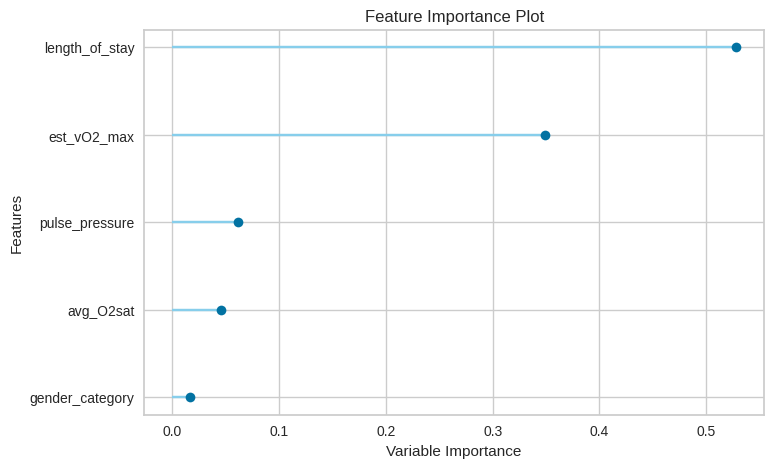

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

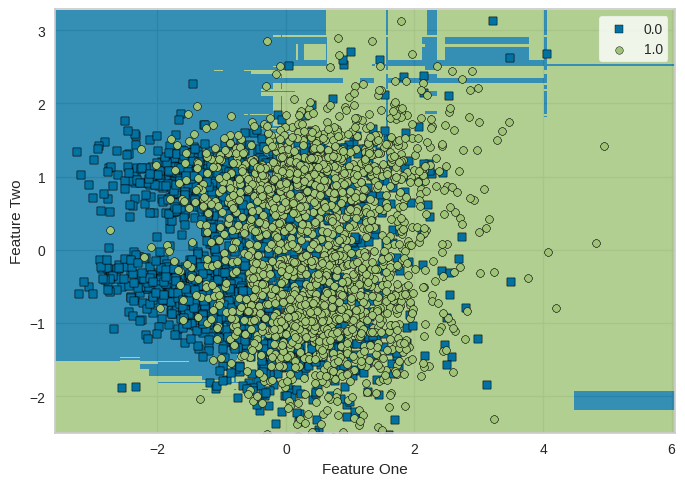

In [ ]:
# make a boundary plot
plot_model(best, 'boundary')


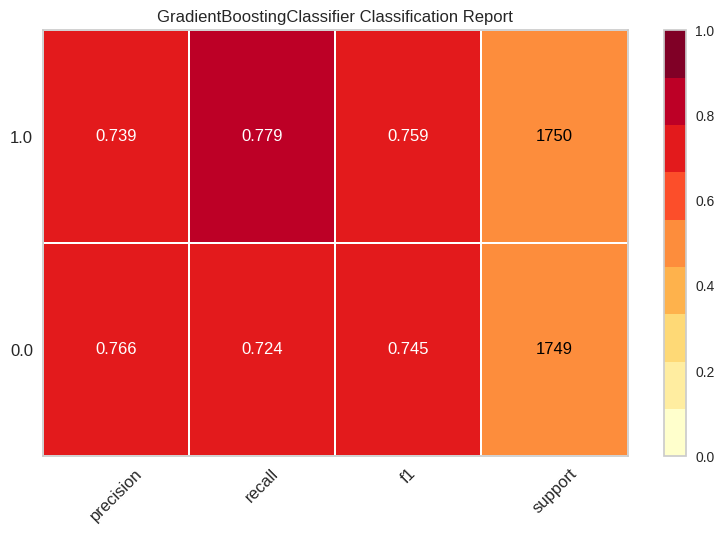

In [ ]:
plot_model(best, plot='class_report', verbose=False)

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7519,0.8187,0.7794,0.7389,0.7586,0.5039,0.5046


In [ ]:
## Model for race category 2 is most accurate

In [ ]:
## Finally would like to see if we find any differences in model behavior between the older more common age groups in the dataset (age groups 6 and 5.. corresponding to patients in their 70s and 60s respectively)... and the younger,
## less common age groups (age groups 1 age 18 to 29, and age group 2; patients in their 30s)

In [ ]:
df2_1 = df2[df2['Age_Group'] == 1]
df2_2 = df2[df2['Age_Group'] == 2]
df2_5 = df2[df2['Age_Group'] == 5]
df2_6 = df2[df2['Age_Group'] == 6]


In [ ]:
data2_1 = df2_1[['AVG_O2SAT','Pulse_Pressure','Est_vO2_Max','AVG_BMI','Survival']]
data2_2 = df2_2[['AVG_O2SAT','Pulse_Pressure','Est_vO2_Max','AVG_BMI','Survival']]
data2_5 = df2_5[['AVG_O2SAT','Pulse_Pressure','Est_vO2_Max','AVG_BMI','Survival']]
data2_6 = df2_6[['AVG_O2SAT','Pulse_Pressure','Est_vO2_Max','AVG_BMI','Survival']]